# Note-6: HSC clonal output analysis
---

**Author:** Chen Weng

**Date:** December 16, 2023

## Description

This Jupyter Notebook reproduce the all analyses in Main Fig. 4, Extended Data Fig. 8 and Supplementary Fig.7, Supplementary Data 4. 

## Related Figures
- Main Fig. 4
- Extended Data Fig. 8 
- Supplementary Fig. 7
- Supplementary Data 4


---

# Install redeemR

In [1]:
#?devtools::install_github("chenweng1991/redeemR")
#.libPaths()

# Import libraries

In [116]:
library(redeemR)
library(ggplot2)
library(ggpubr)
library(ggsci)
library(viridis)
library(dplyr)
library(poolr)
library(qvalue)
library(gridExtra)
# library(Matrix)
# library(Seurat)
# library(harmony)
# library(ggsci)
# library(ggpubr)
# library(gridExtra)
# library(Rmagic)
# library(ggExtra)
# library(viridis)
# library(ggtree)
# library(ggtreeExtra)
# library(poolr)
# library(qvalue)
# library(reshape2)
# library(chromVAR)
# library(Signac)
# library(BSgenome.Hsapiens.UCSC.hg38)
# library(TFBSTools)
# library(JASPAR2020)
# library(motifmatchr)


Loading required package: viridisLite



# Set path

In [3]:
## set main directory to the reproducibility_pub
Dir="/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/reproducibility_pub" # Change this to your actual path **/reproducibility_pub

# Assign progenies to HSC clones Young-1

In [57]:
Young1_T1T2_RigHSC_mitoTracing.sensitive<-readRDS(paste(Dir,"/data/redeemR_object_oldversion/DN4T1T2_RigHSC_mitoTracing.sensitive",sep=""))
Young1_T1T2_BMMC_HSPC_HSC_mitoTracing.sensitive<-readRDS(paste(Dir,"/data/redeemR_object_oldversion/DN4T1T2_BMMC_HSPC_HSC_mitoTracing.sensitive.AddDist",sep=""))

In [58]:
Young1_Rig.CellType<-rbind(cbind(Young1_T1T2_RigHSC_mitoTracing.sensitive@CellMeta[,c("Cell","STD.CellType")],Rig.CellType="HSC") ,
      subset(Young1_T1T2_BMMC_HSPC_HSC_mitoTracing.sensitive@CellMeta,!Cell %in% Young1_T1T2_RigHSC_mitoTracing.sensitive@CellMeta$Cell)[,c("Cell","STD.CellType")] %>% mutate(Rig.CellType=STD.CellType))

In [59]:
## network propagation based assignment for progeny to HSC clonal groups (Leveraging SCAVENGE-L: https://github.com/sankaranlab/SCAVENGE)
Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig<-suppressMessages(ProgenyMapping_np(HSC_redeemR = Young1_T1T2_RigHSC_mitoTracing.sensitive,Full_redeemR = Young1_T1T2_BMMC_HSPC_HSC_mitoTracing.sensitive,CloneCol="Clone_merge",k=30,gm=0.5,useLSI=T,useSCAVENGE_LSI=F,subsample=F,ProbCut = 0.7,Celltype = "Rig.CellType"))

[1] "Note: By default, usLSI=F, the MNN nretwork is based on jaccard; Alternatively, useLSI=T"
[1] "Note: In case useLSI,useSCAVENGE_LSI=T to use SCAVENGE to compute LSI, else, do LSI via Seurat"
[1] "Note: subsample=T, to subsample into same number of seed cells in each clone"
[1] "use LSI"
[1] "use LSI-Seurat"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78


## Supplementary Fig. 7b,c

`summarise()` has grouped output by 'Group'. You can override using the `.groups`
argument.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


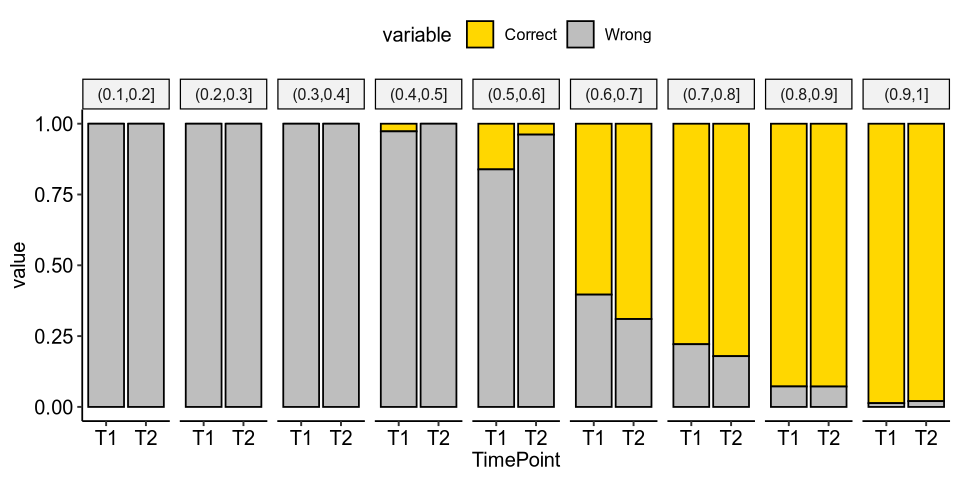

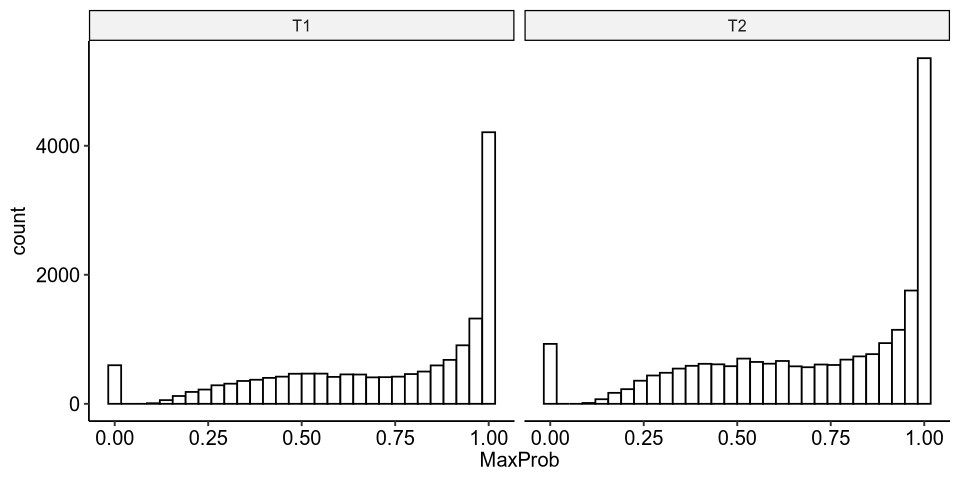

In [60]:
## Use HSC to benchmark the assignment accuracy
options(repr.plot.width=8, repr.plot.height=4,repr.plot.res=120)
p2<-Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig$ALLmeta.npClone %>% merge(.,Young1_T1T2_RigHSC_mitoTracing.sensitive@CellMeta[,c("Cell","Clone_merge","TimePoint")]) %>% mutate(Group=cut(MaxProb,seq(0,1,0.1))) %>% group_by(Group,TimePoint) %>% dplyr::summarise(Correct=length(which(npClone==Clone_merge)),Total=n()) %>% 
    mutate(Wrong=Total-Correct) %>% reshape2::melt(.,id.vars=c("Group","TimePoint","Total")) %>% .[complete.cases(.),] %>%
ggplot()+aes(TimePoint,value,fill=variable)+geom_bar(stat="identity",position="fill",color="black")+facet_grid(.~Group)+theme_pubr()+scale_fill_manual(values=c("gold","grey"))

p3<-merge(Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig$ALLmeta.npClone,Young1_T1T2_BMMC_HSPC_HSC_mitoTracing.sensitive@CellMeta[,c("Cell","TimePoint","STD.CellType")]) %>%
ggplot()+aes(MaxProb)+geom_histogram(fill="white",color="black")+facet_grid(.~TimePoint)+theme_pubr()
print(p2)
print(p3)

## Supplementry Fig. 7a

Using clone as id variables



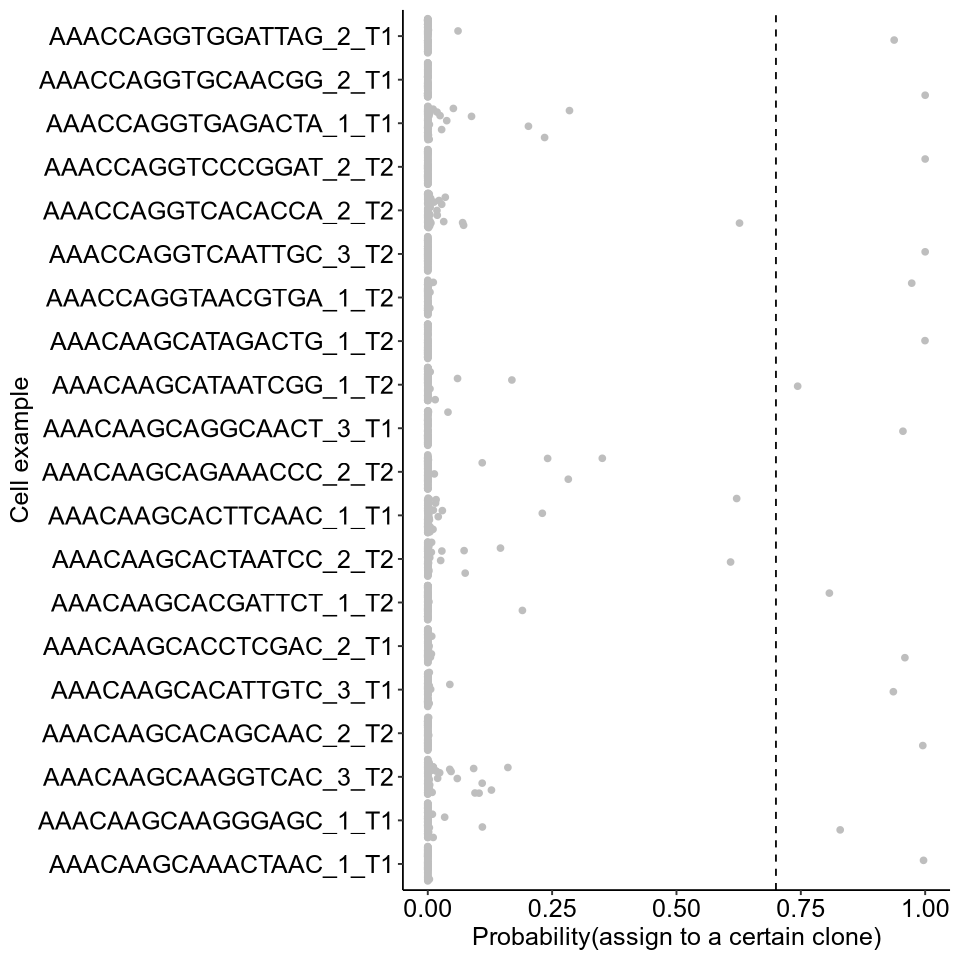

In [61]:
## 
Probability<-Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig$np_mat %>% apply(.,1,function(x){x/sum(x)}) %>% as.data.frame()
p1<-cbind(Probability[,1:20],clone=as.character(1:nrow(Probability))) %>% reshape2::melt() %>% ggplot()+aes(variable,value)+geom_jitter(color="grey")+geom_hline(yintercept = 0.7,linetype=2)+coord_flip()+theme_pubr()+
theme(axis.text = element_text(color='black',size=15),axis.title = element_text(color='black',size=15))+labs(y="Probability(assign to a certain clone)",x="Cell example")
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res=120)
print(p1)

# HSC clonal output levels Young1

In [62]:
ClonalSize<-Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot[,c("npClone","Size","Total.norm")] %>% rename(.,T1T2.Total.norm="Total.norm")
ClonalSize<-ClonalSize[order(ClonalSize$T1T2.Total.norm,decreasing=T),]
ClonalSize<-ClonalSize[order(ClonalSize$T1T2.Total.norm),]

In [63]:
## Create the clonal assignment summary for each cell
Young1_T1T2.ALLmeta.npClone.filtered0.7<-Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig$ALLmeta.npClone.filtered
T1T2_0.7_meta<-Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot[,c("npClone","Total","Size")]
Young1_T1T2.ALLmeta.npClone.filtered0.7$TimePoint<-strsplit(Young1_T1T2.ALLmeta.npClone.filtered0.7$Cell,"_")  %>% sapply(.,function(x){x[[3]]})
Young1_T1T2.ALLmeta.npClone.filtered0.7<-Young1_T1T2.ALLmeta.npClone.filtered0.7 %>% mutate(Lin=recode(Rig.CellType,HSC="Stem",
MPP="EarlyP",CMP="EarlyP",
MKP="MK",
MEP="ME",GMP="Mye",MDP="Mye", EryP="ME",
LMPP="EarlyP",CLP="Lym",ProB="Lym",Plasma="Lym",
Mono="Mye",Ery="Mye",cDC="Mye",
CD4="Lym",CD8="Lym" ,NK="Lym" ,B="Lym" ,pDC="Lym",ProB="Lym")) 
## Split into two time points
Young1_T1T2.ALLmeta.npClone.filtered0.7_T1<-subset(Young1_T1T2.ALLmeta.npClone.filtered0.7,TimePoint=="T1")
Young1_T1T2.ALLmeta.npClone.filtered0.7_T2<-subset(Young1_T1T2.ALLmeta.npClone.filtered0.7,TimePoint=="T2")

In [64]:
T1_datatoplot<-reshape2::dcast(Young1_T1T2.ALLmeta.npClone.filtered0.7_T1,npClone~Lin,fun.aggregate = length) %>% mutate(Total=EarlyP+Lym+ME+MK+Mye) %>% 
merge(.,ClonalSize,by="npClone") %>% mutate(EarlyP=EarlyP/Total,Lym=Lym/Total,ME=ME/Total,MK=MK/Total,Mye=Mye/Total,Total.norm=Total/Size,Total.norm_NPadj=Total/Stem) %>% mutate(TimePoint="T1")

T2_datatoplot<-reshape2::dcast(Young1_T1T2.ALLmeta.npClone.filtered0.7_T2,npClone~Lin,fun.aggregate = length) %>% mutate(Total=EarlyP+Lym+ME+MK+Mye) %>% 
merge(.,ClonalSize,by="npClone") %>% mutate(EarlyP=EarlyP/Total,Lym=Lym/Total,ME=ME/Total,MK=MK/Total,Mye=Mye/Total,Total.norm=Total/Size,Total.norm_NPadj=Total/Stem) %>% mutate(TimePoint="T2")

## Further numalize T1/T2 by total sampling cell numbers 
sampleFactor.T1<-table(Young1_T1T2_BMMC_HSPC_HSC_mitoTracing.sensitive@CellMeta$TimePoint)[1]
sampleFactor.T2<-table(Young1_T1T2_BMMC_HSPC_HSC_mitoTracing.sensitive@CellMeta$TimePoint)[2]

T1_datatoplot$Total.norm.norm<-1e5*T1_datatoplot$Total.norm/sampleFactor.T1
T2_datatoplot$Total.norm.norm<-1e5*T2_datatoplot$Total.norm/sampleFactor.T2
T2_datatoplot$Total.norm.norm<- -T2_datatoplot$Total.norm.norm
## Combine analyzed t1 and T2 together for plotting
T1_T2.datatoplot<-rbind(T1_datatoplot[,c("npClone","Total.norm","Total.norm.norm","T1T2.Total.norm","TimePoint","Size")],T2_datatoplot[,c("npClone","Total.norm","Total.norm.norm","T1T2.Total.norm","TimePoint","Size")]) 

Using Lin as value column: use value.var to override.

Using Lin as value column: use value.var to override.



In [65]:
## Order the clones
Cloneorder<-T1_T2.datatoplot[order(T1_T2.datatoplot$T1T2.Total.norm,decreasing=T),] %>% .$npClone %>% unique

## Main Fig. 4b

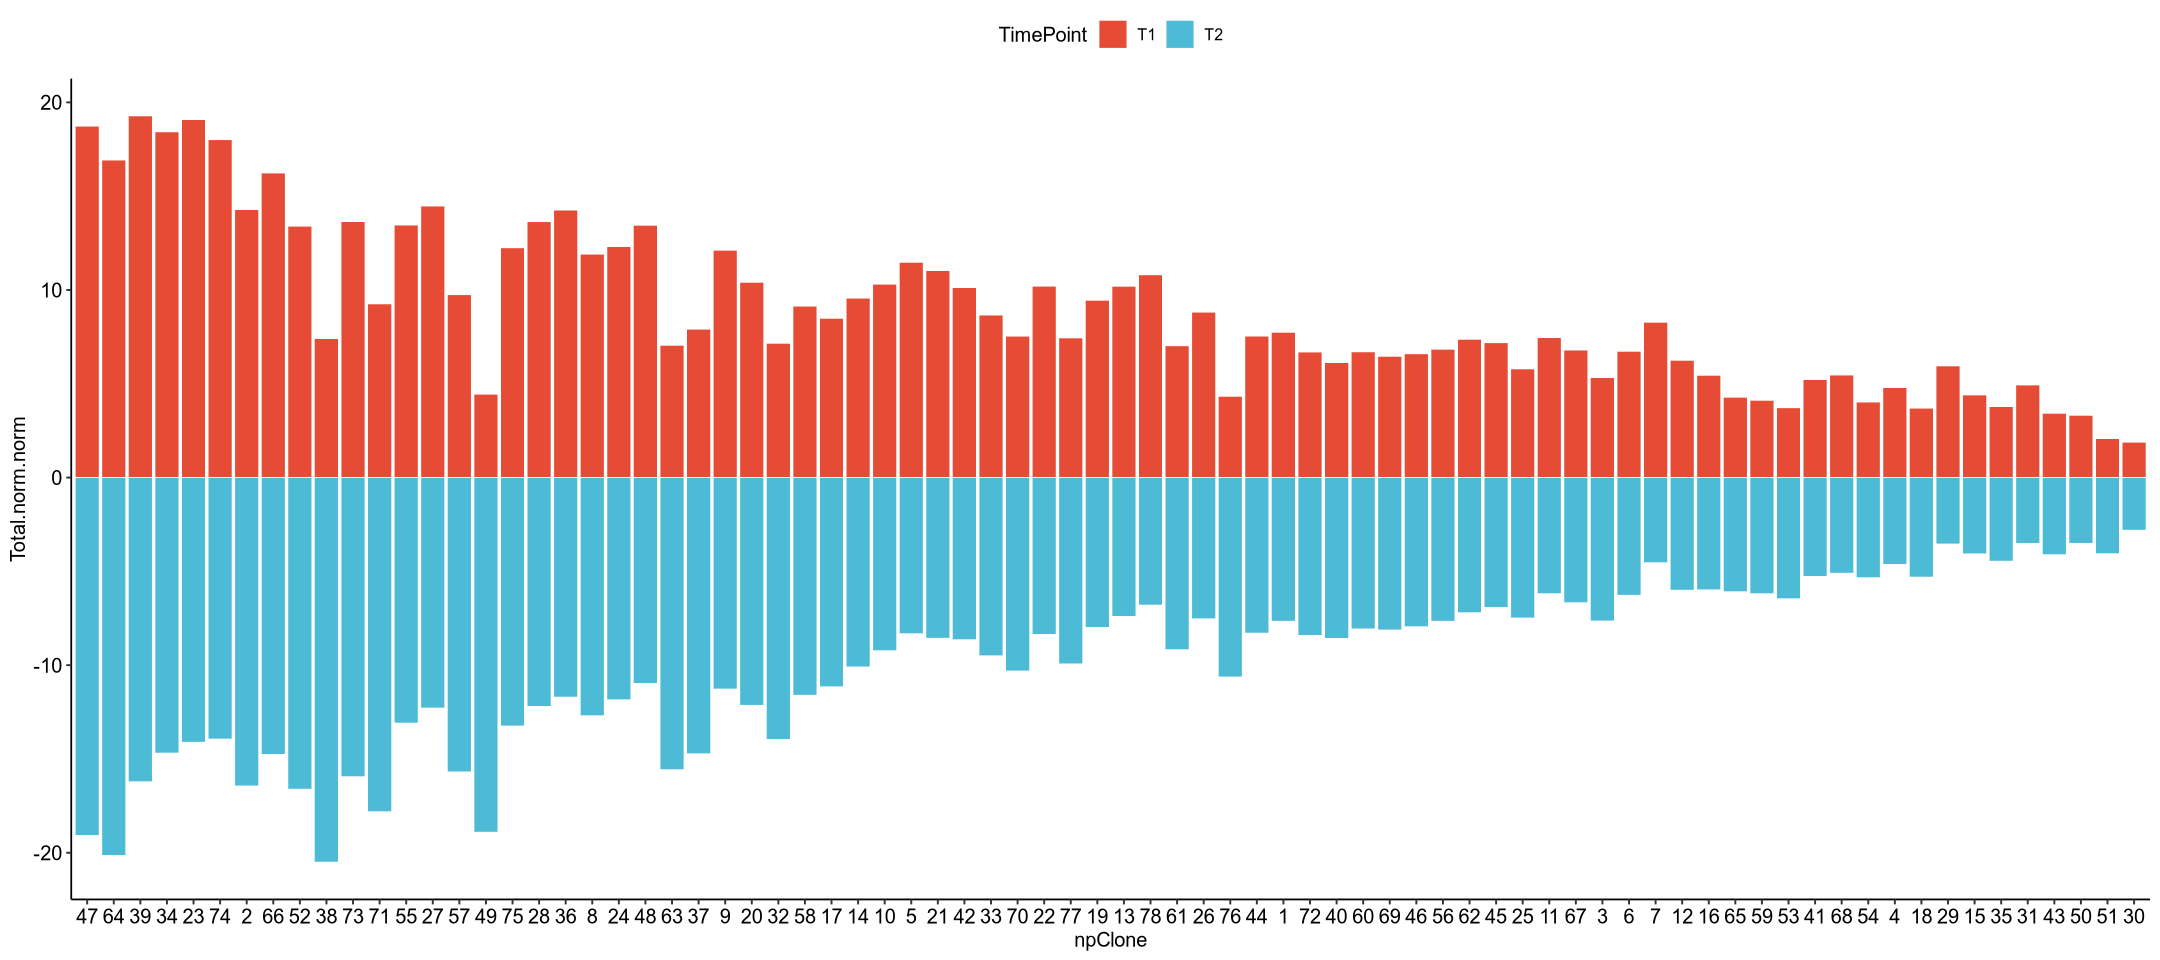

In [70]:
options(repr.plot.width=18, repr.plot.height=8,repr.plot.res=120)
T1_T2.datatoplot$npClone<-factor(T1_T2.datatoplot$npClone,levels=Cloneorder)
ColT1T2<-pal_npg("nrc",alpha=1)(2)
ggplot(T1_T2.datatoplot)+aes(npClone,Total.norm.norm,fill=TimePoint)+geom_bar(stat="identity",color="white",size=0.2)+scale_fill_manual(values=ColT1T2)+theme_pubr()

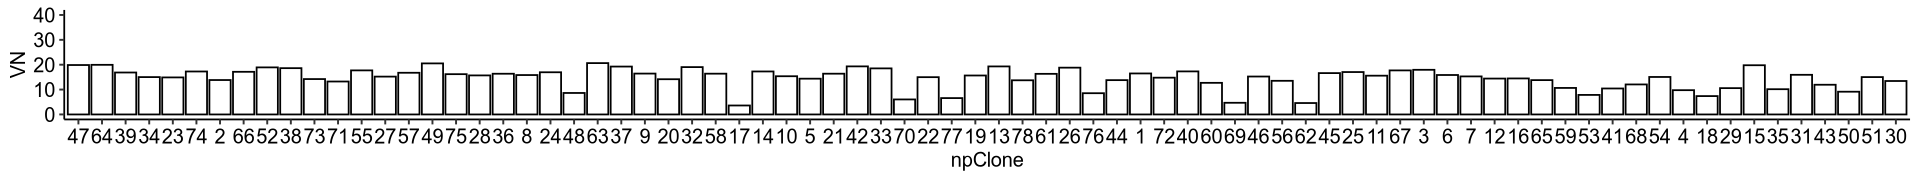

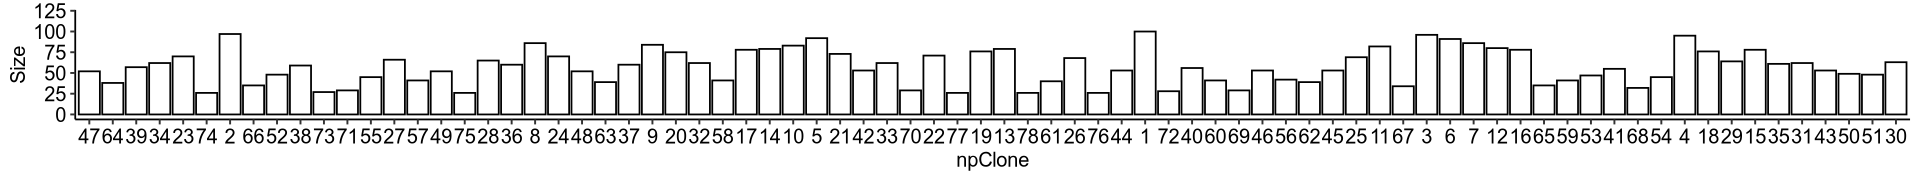

In [71]:
datatoplot<-Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot
datatoplot$npClone<-factor(datatoplot$npClone,levels=levels(T1_T2.datatoplot$npClone))

options(repr.plot.width=16, repr.plot.height=1.5,repr.plot.res=120)
ggplot(datatoplot)+aes(npClone,VN,group=1)+geom_bar(stat="identity",color="black",fill="white")+ylim(0,40)+theme_pubr()
ggplot(datatoplot)+aes(npClone,Size,group=1)+geom_bar(stat="identity",color="black",fill="white")+ylim(0,120)+theme_pubr()


## Main Fig. 4c

Using Total.norm.norm as value column: use value.var to override.



[1] "Peaeson's r: 0.686174723964192"

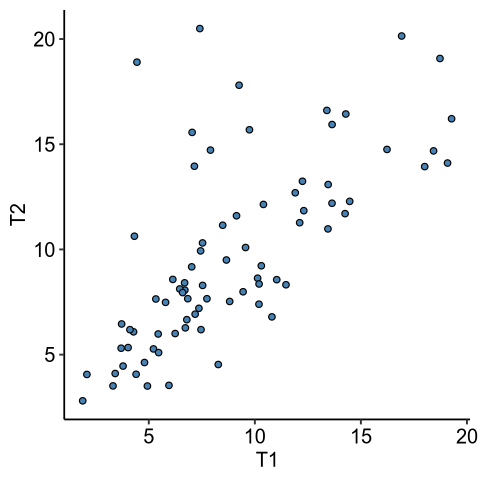

In [72]:
## Compute correlation and plot
T1_T2.datatoplot.flat<-reshape2::dcast(T1_T2.datatoplot[,c("npClone","TimePoint","Total.norm.norm"),],npClone~TimePoint) %>% mutate(T2=-T2) 
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res=120)
paste("Peaeson's r:",cor(T1_T2.datatoplot.flat$T1,T1_T2.datatoplot.flat$T2))
ggplot(T1_T2.datatoplot.flat)+aes(T1,T2)+geom_point(shape=21,color="black",fill="steelblue")+theme_pubr()

## Main Fig. 4d

In [76]:
AccuCurve_Young1_T1<-T1_datatoplot[,c("npClone","Total.norm")] %>% .[order(.$Total.norm,decreasing=T),] %>% mutate(accu=cumsum(Total.norm)) %>% mutate(accu=accu/sum(Total.norm)) %>% 
mutate(rank=1:nrow(T1_datatoplot)) %>% mutate(rankPer=rank/nrow(T1_datatoplot))
AccuCurve_Young1_T2<-T2_datatoplot[,c("npClone","Total.norm")] %>% .[order(.$Total.norm,decreasing=T),] %>% mutate(accu=cumsum(Total.norm)) %>% mutate(accu=accu/sum(Total.norm)) %>% 
mutate(rank=1:nrow(T2_datatoplot)) %>% mutate(rankPer=rank/nrow(T2_datatoplot))
AccuCurve_Young2<-Young2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot[,c("npClone","Total.norm")] %>% .[order(.$Total.norm,decreasing=T),] %>% mutate(accu=cumsum(Total.norm)) %>% mutate(accu=accu/sum(Total.norm)) %>% 
mutate(rank=1:nrow(Young2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot)) %>% mutate(rankPer=rank/nrow(Young2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot))

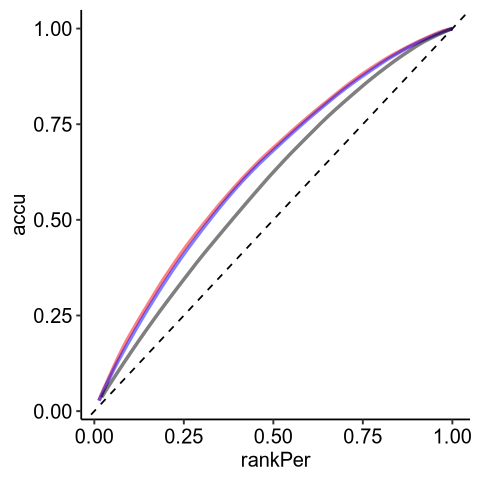

In [80]:
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res=120)
p<-ggplot()+geom_abline(intercept = 0,slope = 1,linetype=2)+geom_line(data=AccuCurve_Young1_T1,aes(rankPer,accu),size=1,color="red",alpha=0.5)+
geom_line(data=AccuCurve_Young1_T2,aes(rankPer,accu),size=1,color="blue",alpha=0.5)+
geom_line(data=AccuCurve_Young2,aes(rankPer,accu),size=1,color="black",alpha=0.5)+
theme_pubr()
print(p)


# HSC clonal biases Young1

In [51]:
T1_datatoplot.count<-reshape2::dcast(Young1_T1T2.ALLmeta.npClone.filtered0.7_T1,npClone~Lin,fun.aggregate = length) %>% mutate(Total=EarlyP+Lym+ME+MK+Mye) %>% 
merge(.,ClonalSize,by="npClone") 

T2_datatoplot.count<-reshape2::dcast(Young1_T1T2.ALLmeta.npClone.filtered0.7_T2,npClone~Lin,fun.aggregate = length) %>% mutate(Total=EarlyP+Lym+ME+MK+Mye) %>% 
merge(.,ClonalSize,by="npClone") 

T12_datatoplot.count<-reshape2::dcast(Young1_T1T2.ALLmeta.npClone.filtered0.7,npClone~Lin,fun.aggregate = length) %>% mutate(Total=EarlyP+Lym+ME+MK+Mye) %>% 
merge(.,ClonalSize,by="npClone") 

Using Lin as value column: use value.var to override.

Using Lin as value column: use value.var to override.

Using Lin as value column: use value.var to override.



In [52]:
# Compute expected proportion for T1+T2
Exp_T12<-colSums(T12_datatoplot.count[,2:6])/sum(T12_datatoplot.count$Total)
Exp_T12
log2FCs_T12<-c()
ps_T12<-c()
for(i in 1:nrow(T12_datatoplot.count)){
md.Lym<-binom.test(T12_datatoplot.count[i,"Lym"],T12_datatoplot.count[i,"Total"],p=Exp_T12["Lym"],alternative="greater")
md.Mye<-binom.test(T12_datatoplot.count[i,"Mye"],T12_datatoplot.count[i,"Total"],p=Exp_T12["Mye"],alternative="greater")
md.ME<-binom.test(T12_datatoplot.count[i,"ME"],T12_datatoplot.count[i,"Total"],p=Exp_T12["ME"],alternative="greater")
md.MK<-binom.test(T12_datatoplot.count[i,"MK"],T12_datatoplot.count[i,"Total"],p=Exp_T12["MK"],alternative="greater")
log2FC<-c(log2(md.Lym$estimate/Exp_T12["Lym"]),log2(md.Mye$estimate/Exp_T12["Mye"]),log2(md.ME$estimate/Exp_T12["ME"]),log2(md.MK$estimate/Exp_T12["MK"]))
p<-c(md.Lym$p.value,md.Mye$p.value,md.ME$p.value,md.MK$p.value)
log2FCs_T12<-rbind(log2FCs_T12,log2FC)
ps_T12<-rbind(ps_T12,p)
}
row.names(log2FCs_T12)<-T12_datatoplot.count$npClone
row.names(ps_T12)<-T12_datatoplot.count$npClone

# Compute expected proportion for T1
Exp_T1<-colSums(T1_datatoplot.count[,2:6])/sum(T1_datatoplot.count$Total)
Exp_T1
log2FCs_T1<-c()
ps_T1<-c()
for(i in 1:nrow(T1_datatoplot.count)){
md.Lym<-binom.test(T1_datatoplot.count[i,"Lym"],T1_datatoplot.count[i,"Total"],p=Exp_T1["Lym"],alternative="greater")
md.Mye<-binom.test(T1_datatoplot.count[i,"Mye"],T1_datatoplot.count[i,"Total"],p=Exp_T1["Mye"],alternative="greater")
md.ME<-binom.test(T1_datatoplot.count[i,"ME"],T1_datatoplot.count[i,"Total"],p=Exp_T1["ME"],alternative="greater")
md.MK<-binom.test(T1_datatoplot.count[i,"MK"],T1_datatoplot.count[i,"Total"],p=Exp_T1["MK"],alternative="greater")
log2FC<-c(log2(md.Lym$estimate/Exp_T1["Lym"]),log2(md.Mye$estimate/Exp_T1["Mye"]),log2(md.ME$estimate/Exp_T1["ME"]),log2(md.MK$estimate/Exp_T1["MK"]))
p<-c(md.Lym$p.value,md.Mye$p.value,md.ME$p.value,md.MK$p.value)
log2FCs_T1<-rbind(log2FCs_T1,log2FC)
ps_T1<-rbind(ps_T1,p)
}
row.names(log2FCs_T1)<-T1_datatoplot.count$npClone
row.names(ps_T1)<-T1_datatoplot.count$npClone

# Compute expected proportion for T2
Exp_T2<-colSums(T2_datatoplot.count[,2:6])/sum(T2_datatoplot.count$Total)
Exp_T2
log2FCs_T2<-c()
ps_T2<-c()
for(i in 1:nrow(T2_datatoplot.count)){
md.Lym<-binom.test(T2_datatoplot.count[i,"Lym"],T2_datatoplot.count[i,"Total"],p=Exp_T2["Lym"],alternative="greater")
md.Mye<-binom.test(T2_datatoplot.count[i,"Mye"],T2_datatoplot.count[i,"Total"],p=Exp_T2["Mye"],alternative="greater")
md.ME<-binom.test(T2_datatoplot.count[i,"ME"],T2_datatoplot.count[i,"Total"],p=Exp_T2["ME"],alternative="greater")
md.MK<-binom.test(T2_datatoplot.count[i,"MK"],T2_datatoplot.count[i,"Total"],p=Exp_T2["MK"],alternative="greater")
log2FC<-c(log2(md.Lym$estimate/Exp_T2["Lym"]),log2(md.Mye$estimate/Exp_T2["Mye"]),log2(md.ME$estimate/Exp_T2["ME"]),log2(md.MK$estimate/Exp_T2["MK"]))
p<-c(md.Lym$p.value,md.Mye$p.value,md.ME$p.value,md.MK$p.value)
log2FCs_T2<-rbind(log2FCs_T2,log2FC)
ps_T2<-rbind(ps_T2,p)
}
row.names(log2FCs_T2)<-T2_datatoplot.count$npClone
row.names(ps_T2)<-T2_datatoplot.count$npClone

EarlyP        Lym         ME         MK        Mye 
0.20811120 0.45995176 0.16838030 0.03757299 0.12598375

EarlyP        Lym         ME         MK        Mye 
0.16342839 0.48793482 0.12065183 0.05076778 0.17721717

EarlyP        Lym         ME         MK        Mye 
0.23853211 0.44090036 0.20087476 0.02858972 0.09110305

In [53]:
## Lineage biased clone identification  Critieria: 1, T1T2 p value<0.05 and T1 T2 consistent
## Identify Lym bias clones
LymClones<-names(ps_T1[which(ps_T12[,1]<0.05),1]>0 & log2FCs_T2[which(ps_T12[,1]<0.05),1]>0)
MyeClones<-names(ps_T1[which(ps_T12[,2]<0.05),1]>0 & log2FCs_T2[which(ps_T12[,2]<0.05),1]>0)
MEClones<-names(ps_T1[which(ps_T12[,3]<0.05),1]>0 & log2FCs_T2[which(ps_T12[,3]<0.05),1]>0)
MKClones<-names(ps_T1[which(ps_T12[,4]<0.05),1]>0 & log2FCs_T2[which(ps_T12[,4]<0.05),1]>0)

In [54]:
tagp<-function(x){
    if(x<0.001){
        return("***")
    }else if(x>=0.001 & x<0.01){
        return("**")    
    }else if(x>=0.01 & x<0.05){
        return("*")
    }else{
        return("")
    }
}
makemelt<-function(datatoplot){
datatoplot.general<-datatoplot[,c("Clone","Type","All.pvalue","call","sig.all")]
datatoplot.m<-rbind(data.frame(Clone=datatoplot[,"Clone"],TimePoint="T1",log2FC=datatoplot[,"Log2FC.T1"],pvalue=datatoplot[,"pvalue.T1"],sig=datatoplot[,"sig.T1"]),
data.frame(Clone=datatoplot[,"Clone"],TimePoint="T2",log2FC=datatoplot[,"Log2FC.T2"],pvalue=datatoplot[,"pvalue.T2"],sig=datatoplot[,"sig.T2"])) %>% 
merge(.,datatoplot.general,by="Clone")
return(datatoplot.m)
}

In [55]:
i=1
Lym.datatoplot<-data.frame(Type="Lym",Clone=row.names(ps_T1),All.pvalue=ps_T12[,i],Log2FC.T1=log2FCs_T1[,i],Log2FC.T2=log2FCs_T2[,i],pvalue.T1=ps_T1[,i],pvalue.T2=ps_T2[,i]) %>% 
mutate(sig.T1=sapply(pvalue.T1,tagp),sig.T2=sapply(pvalue.T2,tagp),sig.all=sapply(All.pvalue,tagp)) %>% mutate(call=ifelse(All.pvalue<0.05 & Log2FC.T1>0 & Log2FC.T2>0,"LymBias",""))


i=2
Mye.datatoplot<-data.frame(Type="Mye",Clone=row.names(ps_T1),All.pvalue=ps_T12[,i],Log2FC.T1=log2FCs_T1[,i],Log2FC.T2=log2FCs_T2[,i],pvalue.T1=ps_T1[,i],pvalue.T2=ps_T2[,i]) %>% 
mutate(sig.T1=sapply(pvalue.T1,tagp),sig.T2=sapply(pvalue.T2,tagp),sig.all=sapply(All.pvalue,tagp)) %>% mutate(call=ifelse(All.pvalue<0.05 & Log2FC.T1>0 & Log2FC.T2>0,"MyeBias",""))

i=3
ME.datatoplot<-data.frame(Type="ME",Clone=row.names(ps_T1),All.pvalue=ps_T12[,i],Log2FC.T1=log2FCs_T1[,i],Log2FC.T2=log2FCs_T2[,i],pvalue.T1=ps_T1[,i],pvalue.T2=ps_T2[,i]) %>% 
mutate(sig.T1=sapply(pvalue.T1,tagp),sig.T2=sapply(pvalue.T2,tagp),sig.all=sapply(All.pvalue,tagp)) %>% mutate(call=ifelse(All.pvalue<0.05 & Log2FC.T1>0 & Log2FC.T2>0,"MEBias",""))

i=4
MK.datatoplot<-data.frame(Type="MK",Clone=row.names(ps_T1),All.pvalue=ps_T12[,i],Log2FC.T1=log2FCs_T1[,i],Log2FC.T2=log2FCs_T2[,i],pvalue.T1=ps_T1[,i],pvalue.T2=ps_T2[,i]) %>% 
mutate(sig.T1=sapply(pvalue.T1,tagp),sig.T2=sapply(pvalue.T2,tagp),sig.all=sapply(All.pvalue,tagp)) %>% mutate(call=ifelse(All.pvalue<0.05 & Log2FC.T1>0 & Log2FC.T2>0,"MKBias",""))

In [56]:
Lym.clones<-subset(Lym.datatoplot,call=="LymBias") %>% .[order(.$All.pvalue),] %>% .$Clone
Mye.clones<-subset(Mye.datatoplot,call=="MyeBias") %>% .[order(.$All.pvalue),] %>% .$Clone
ME.clones<-subset(ME.datatoplot,call=="MEBias") %>% .[order(.$All.pvalue),] %>% .$Clone
MK.clones<-subset(MK.datatoplot,call=="MKBias") %>% .[order(.$All.pvalue),] %>% .$Clone
BiasClone<-c(Lym.clones,Mye.clones,ME.clones,MK.clones) %>% unique
UnBiasedClone<-setdiff(Lym.datatoplot$Clone,BiasClone)
CloneOrder<-c(BiasClone,UnBiasedClone)

In [57]:
## This is for main text --/  
## Notably, for the biased clones, the lineage preference shows moderate effect size (with a median 1.55 fold change) --/
## Subtitle "Identifying differentiated progeny of HSCs to assess clonal output and lineage biases" 
a<-c(subset(Lym.datatoplot,All.pvalue<=0.001)$Log2FC.T1,subset(Lym.datatoplot,All.pvalue<=0.001)$Log2FC.T2) %>% median %>% 2^.
b<-c(subset(Mye.datatoplot,All.pvalue<=0.001)$Log2FC.T1,subset(Mye.datatoplot,All.pvalue<=0.001)$Log2FC.T2) %>% median %>% 2^.
c<-c(subset(ME.datatoplot,All.pvalue<=0.001)$Log2FC.T1,subset(ME.datatoplot,All.pvalue<=0.001)$Log2FC.T2) %>% median %>% 2^.
d<-c(subset(MK.datatoplot,All.pvalue<=0.05)$Log2FC.T1,subset(MK.datatoplot,All.pvalue<=0.05)$Log2FC.T2) %>% median %>% 2^.

mean(c(a,b,c,d))

[1] 1.548095

## Main Fig. 4e top

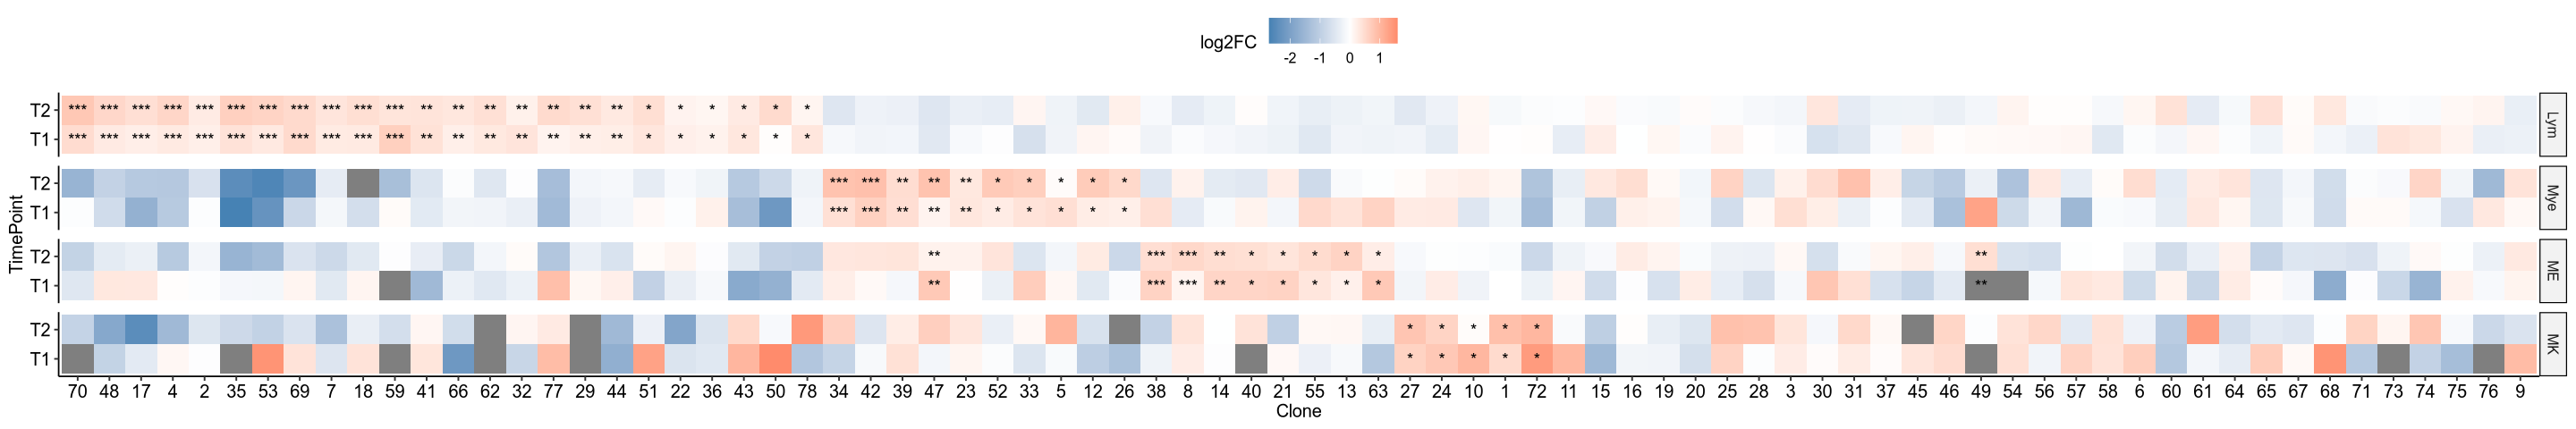

In [58]:
datatoplot.m<-rbind(makemelt(Lym.datatoplot),makemelt(Mye.datatoplot),makemelt(ME.datatoplot),makemelt(MK.datatoplot))
datatoplot.m$Clone<-factor(datatoplot.m$Clone,levels=CloneOrder)
datatoplot.m$Type<-factor(datatoplot.m$Type,levels=c("Lym","Mye","ME","MK"))
options(repr.plot.width=24, repr.plot.height=4,repr.plot.res=120)
p.pvalueFC<-ggplot(datatoplot.m)+aes(Clone,TimePoint,fill=log2FC,label=sig.all)+geom_tile()+scale_fill_gradient2(high="red",low="steelblue",mid="white")+geom_text()+facet_grid(Type~.)+theme_pubr()
print(p.pvalueFC)

## Supplementary Data 4

In [66]:
## Compute combined p values Fisher's method 
tagp<-function(x){
    if(x<0.01){
        return("***")
    }else if(x>=0.01 & x<0.05){
        return("**")    
    }else if(x>=0.05 & x<0.2){
        return("*")
    }else{
        return("")
    }
}

library(poolr)
runfisher<-function(x,y){
    result<-fisher(c(x,y))$p
    return(result)
}
Total.datatoplot<-rbind(Lym.datatoplot,Mye.datatoplot,ME.datatoplot,MK.datatoplot) %>% .[,1:7]
Total.datatoplot$Combined.pvalue<-mapply(runfisher,Total.datatoplot$pvalue.T1,Total.datatoplot$pvalue.T2)
Total.datatoplot$FDR<-qvalue(Total.datatoplot$Combined.pvalue)$qvalues
Total.datatoplot$tag<-sapply(Total.datatoplot$FDR,tagp)
HSC_Clonal_CellType<-Total.datatoplot[order(Total.datatoplot$FDR),] %>% select(-All.pvalue)

In [65]:
head(HSC_Clonal_CellType)

Type Clone Log2FC.T1 Log2FC.T2 pvalue.T1   pvalue.T2    Combined.pvalue
70 Lym  70    0.4909191 0.7809375 0.014392838 1.694226e-07 5.079800e-08   
48 Lym  48    0.2939739 0.5617475 0.012415673 1.686898e-06 3.912631e-07   
17 Lym  17    0.2380565 0.4544939 0.043917847 3.975619e-06 2.891520e-06   
4  Lym  4     0.3048467 0.5815626 0.032294463 1.148940e-05 5.865072e-06   
2  Lym  2     0.2295085 0.2842862 0.007288819 1.851615e-04 1.959051e-05   
35 Lym  35    0.4107488 0.6669023 0.036142310 4.467580e-05 2.314875e-05   
   FDR          tag
70 1.584898e-05 ***
48 6.103705e-05 ***
17 3.007181e-04 ***
4  4.574757e-04 ***
2  1.203735e-03 ***
35 1.203735e-03 ***

## Main Fig. 4e bottom

Using npClone as id variables



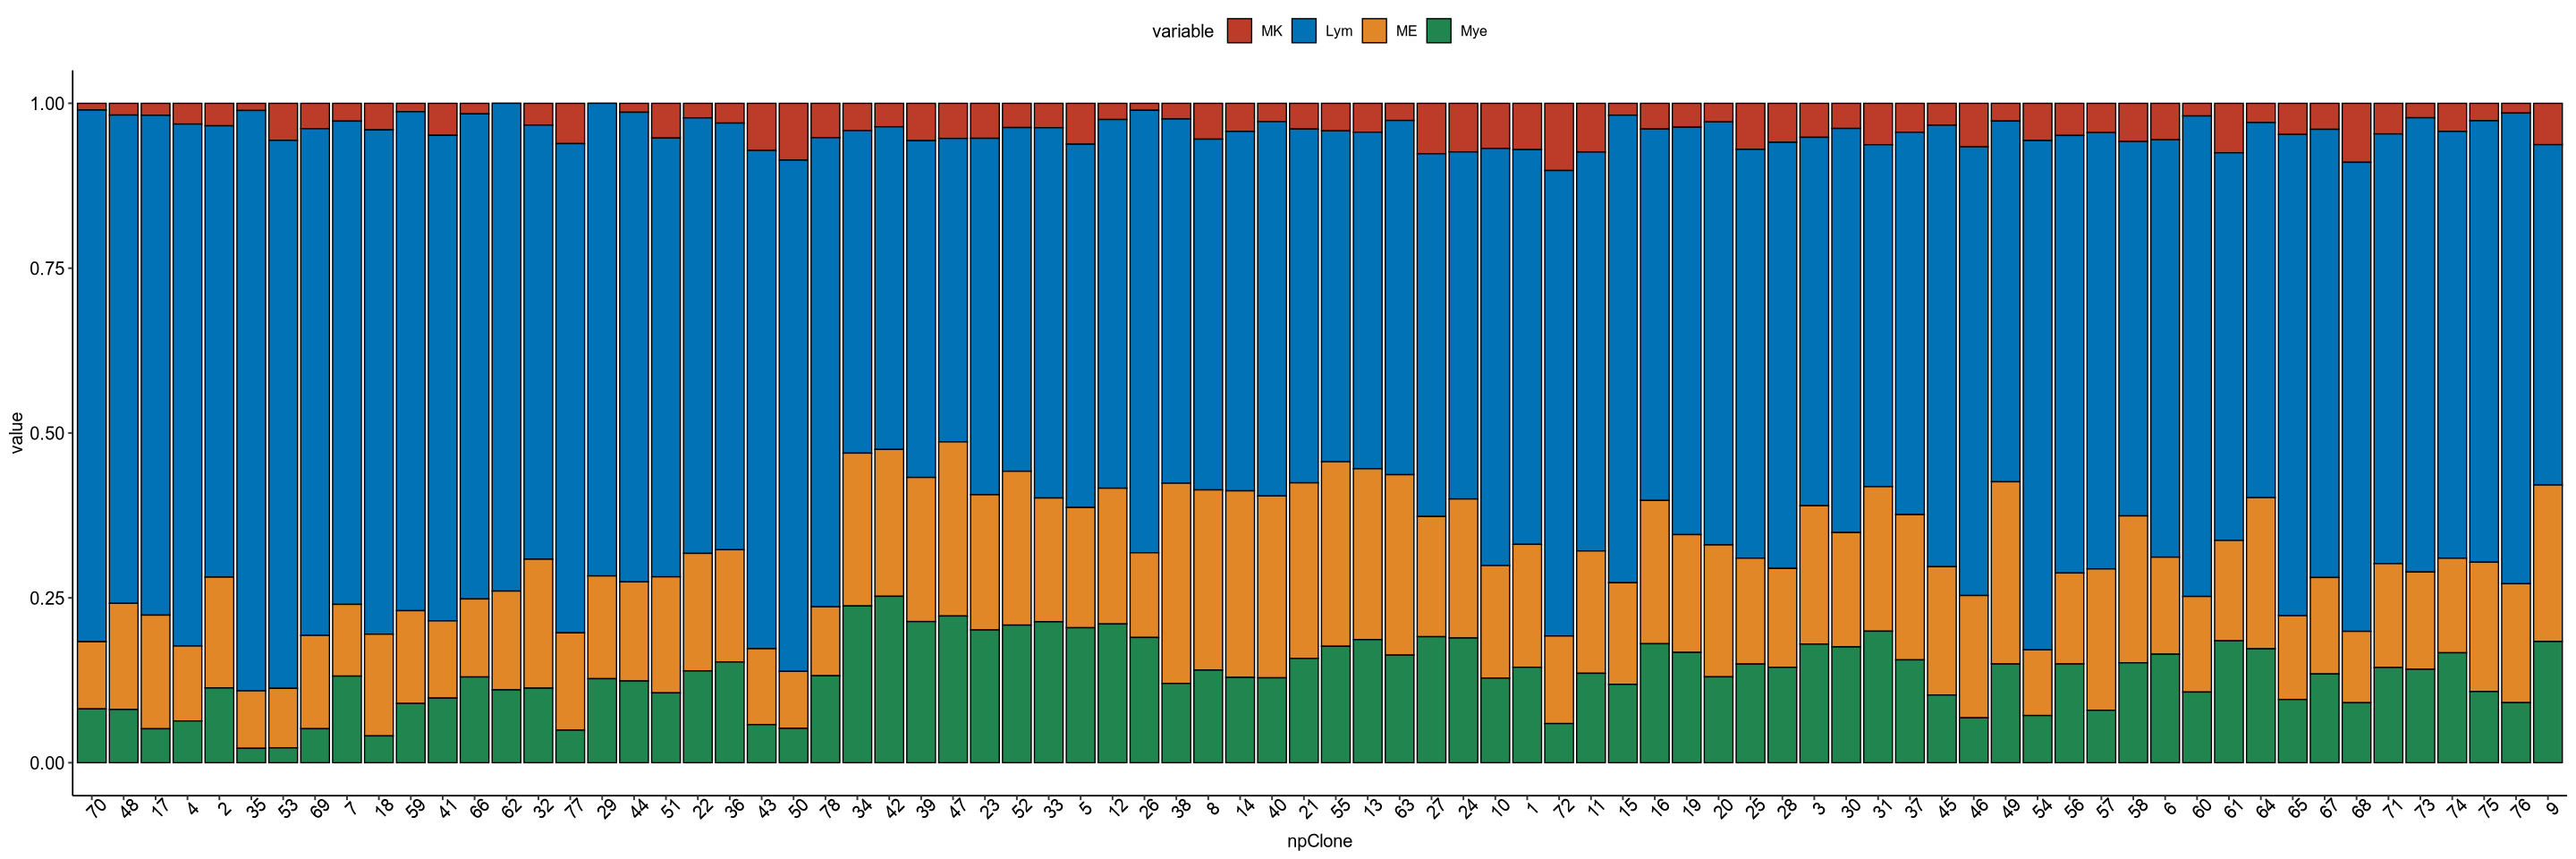

In [67]:
datatoplot<-Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot
datatoplot<-datatoplot %>% dplyr::select(npClone,MK,Lym,ME,Total.norm_NPadj,Mye) %>%
mutate(Lym=Lym/(Lym+Mye+ME+MK),Mye=Mye/(Lym+Mye+ME+MK),ME=ME/(Lym+Mye+ME+MK),MK=MK/(Lym+Mye+ME+MK))
p<-datatoplot[order(datatoplot[,"npClone"],decreasing=F),] %>% mutate(npClone=factor(npClone,levels=CloneOrder)) %>% dplyr::select(-Total.norm_NPadj)%>% reshape2::melt() %>%
ggplot()+aes(npClone,value,fill=variable)+geom_bar(stat="identity",position="fill",color="black",size=0.4)+scale_fill_nejm()+theme_pubr()+theme(axis.text.x  = element_text(angle = 45))
options(repr.plot.width=24, repr.plot.height=8,repr.plot.res=120)
print(p)

Note: as in main figure 4e, the significane are based on combined FDR, shown in table *HSC_Clonal_CellType*
- 70~78 are Lymphoid biased clones; 
- 34~26 are Myeloid biased; 
- 38~63 Ery-biased clones;
- 27~72 MK-biased clones;

# HSC clonal output VS bias young1

In [68]:
datatoplot<-Young1_T1T2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot.scale

## Main Fig. 4f

In [69]:
lm(Lym~OutLevel.scale,data=datatoplot) %>% summary
lm(Mye~OutLevel.scale,data=datatoplot) %>% summary
lm(ME~OutLevel.scale,data=datatoplot) %>% summary
lm(MK~OutLevel.scale,data=datatoplot) %>% summary


Call:
lm(formula = Lym ~ OutLevel.scale, data = datatoplot)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1062 -0.7357 -0.2413  0.7070  2.6377 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.305e-16  1.025e-01   0.000        1    
OutLevel.scale -4.373e-01  1.032e-01  -4.239 6.25e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9052 on 76 degrees of freedom
Multiple R-squared:  0.1912,	Adjusted R-squared:  0.1806 
F-statistic: 17.97 on 1 and 76 DF,  p-value: 6.253e-05



Call:
lm(formula = Mye ~ OutLevel.scale, data = datatoplot)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78062 -0.57325  0.03627  0.54255  2.43916 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -8.972e-17  1.035e-01   0.000 1.000000    
OutLevel.scale  4.195e-01  1.041e-01   4.029 0.000132 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9137 on 76 degrees of freedom
Multiple R-squared:  0.176,	Adjusted R-squared:  0.1651 
F-statistic: 16.23 on 1 and 76 DF,  p-value: 0.0001319



Call:
lm(formula = ME ~ OutLevel.scale, data = datatoplot)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85864 -0.60054 -0.05218  0.34145  2.23076 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.295e-17  1.002e-01   0.000        1    
OutLevel.scale  4.760e-01  1.009e-01   4.718 1.06e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8852 on 76 degrees of freedom
Multiple R-squared:  0.2266,	Adjusted R-squared:  0.2164 
F-statistic: 22.26 on 1 and 76 DF,  p-value: 1.06e-05



Call:
lm(formula = MK ~ OutLevel.scale, data = datatoplot)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.15534 -0.71103 -0.05423  0.65291  2.58633 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)    -6.848e-17  1.134e-01   0.000    1.000
OutLevel.scale -9.549e-02  1.142e-01  -0.836    0.406

Residual standard error: 1.002 on 76 degrees of freedom
Multiple R-squared:  0.009118,	Adjusted R-squared:  -0.00392 
F-statistic: 0.6993 on 1 and 76 DF,  p-value: 0.4056


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


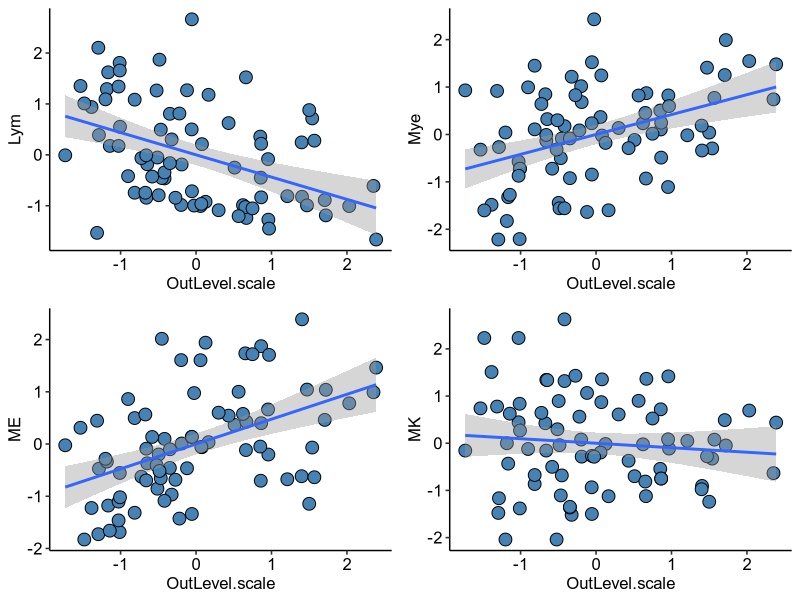

In [74]:
library(ggrepel)
p1<- ggplot(datatoplot)+aes(OutLevel.scale,Lym)+geom_point(shape=21,color="black",fill="steelblue",size=4)+theme_pubr()+geom_smooth(method="lm")
p2<- ggplot(datatoplot)+aes(OutLevel.scale,Mye)+geom_point(shape=21,color="black",fill="steelblue",size=4)+theme_pubr()+geom_smooth(method="lm")
p3<- ggplot(datatoplot)+aes(OutLevel.scale,ME)+geom_point(shape=21,color="black",fill="steelblue",size=4)+theme_pubr()+geom_smooth(method="lm")
p4<- ggplot(datatoplot)+aes(OutLevel.scale,MK)+geom_point(shape=21,color="black",fill="steelblue",size=4)+theme_pubr()+geom_smooth(method="lm")
options(repr.plot.width=8, repr.plot.height=6,repr.plot.res=100)
grid.arrange(p1,p2,p3,p4,nrow=2)

# Repeat analysis on Young2

In [4]:
Young2_RigHSC_mitoTracing.sensitive<-readRDS(paste(Dir,"/data/redeemR_object_oldversion/DN9_RigHSC_mitoTracing.sensitive",sep=""))
Young2_BMMC_HSPC_HSC_mitoTracing.sensitive<-readRDS(paste(Dir,"/data/redeemR_object_oldversion/DN9_BMMC_HSPC_HSC_mitoTracing.sensitive.AddDist",sep=""))

In [40]:
Young2_RigHSC_LSI_progeny_np_0.7_rig<-readRDS(paste(Dir,"/data/SCAVENGE-L/DN9_RigHSC_LSI_progeny_np_0.7_rig",sep=""))

In [41]:
## Add rig cell type
Young2_Rig.CellType<-rbind(cbind(Young2_RigHSC_mitoTracing.sensitive@CellMeta[,c("Cell","STD.CellType")],Rig.CellType="HSC") ,
      subset(Young2_BMMC_HSPC_HSC_mitoTracing.sensitive@CellMeta,!Cell %in% Young2_RigHSC_mitoTracing.sensitive@CellMeta$Cell)[,c("Cell","STD.CellType")] %>% mutate(Rig.CellType=STD.CellType))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


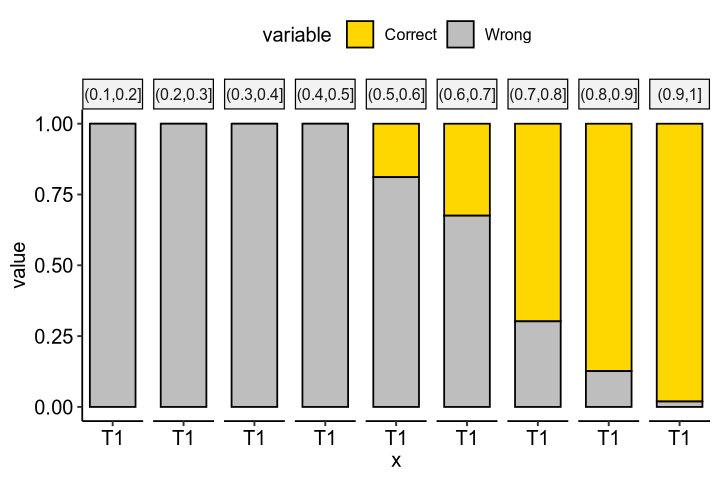

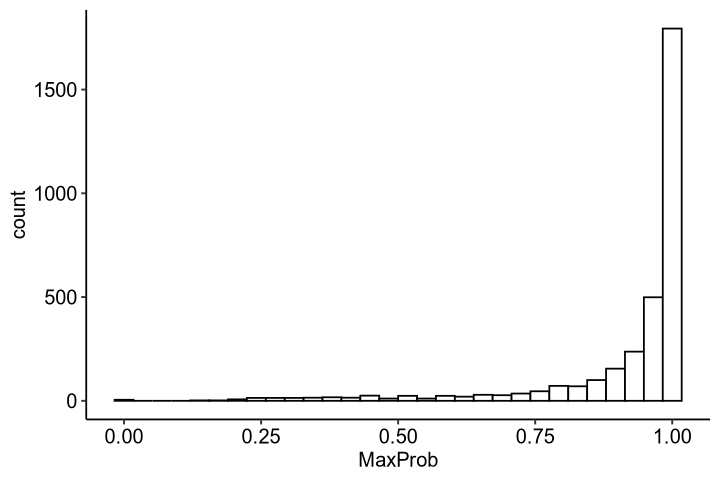

In [42]:
## Use HSC to benchmark the assignment accuracy
options(repr.plot.width=6, repr.plot.height=4,repr.plot.res=120)
p2<-Young2_RigHSC_LSI_progeny_np_0.7_rig$ALLmeta.npClone %>% merge(.,Young2_RigHSC_mitoTracing.sensitive@CellMeta[,c("Cell","Clone_merge")]) %>% mutate(Group=cut(MaxProb,seq(0,1,0.1))) %>% group_by(Group) %>% dplyr::summarise(Correct=length(which(npClone==Clone_merge)),Total=n()) %>% 
    mutate(Wrong=Total-Correct) %>% reshape2::melt(.,id.vars=c("Group","Total")) %>% .[complete.cases(.),] %>%
ggplot()+aes("T1",value,fill=variable)+geom_bar(stat="identity",position="fill",color="black")+facet_grid(.~Group)+theme_pubr()+scale_fill_manual(values=c("gold","grey"))

p3<-merge(Young2_RigHSC_LSI_progeny_np_0.7_rig$ALLmeta.npClone,Young2_RigHSC_mitoTracing.sensitive@CellMeta[,c("Cell","Clone_merge")]) %>%
ggplot()+aes(MaxProb)+geom_histogram(fill="white",color="black")+theme_pubr()
print(p2)
print(p3)

In [43]:
ClonalSize<-Young2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot[,c("npClone","Size","Total.norm")] 
ClonalSize<-ClonalSize[order(ClonalSize$Total.norm,decreasing=T),]
ClonalSize<-ClonalSize[order(ClonalSize$Total.norm),]

In [44]:
Young2.ALLmeta.npClone.filtered0.7<-Young2_RigHSC_LSI_progeny_np_0.7_rig$ALLmeta.npClone %>% mutate(Lin=recode(Rig.CellType,HSC="Stem",
MPP="EarlyP",CMP="EarlyP",
MKP="MK",
MEP="ME",GMP="Mye",MDP="Mye", EryP="ME",
LMPP="EarlyP",CLP="Lym",ProB="Lym",Plasma="Lym",
Mono="Mye",Ery="Mye",cDC="Mye",
CD4="Lym",CD8="Lym" ,NK="Lym" ,B="Lym" ,pDC="Lym",ProB="Lym")) 

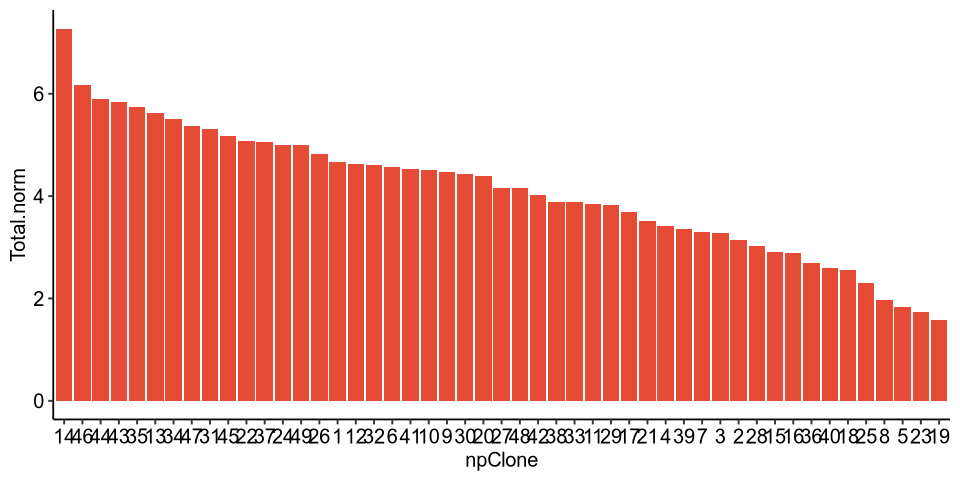

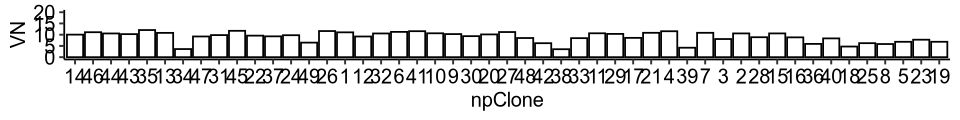

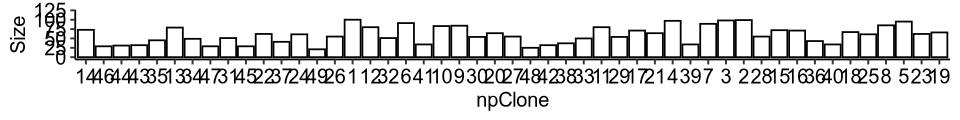

In [45]:
datatoplot<-Young2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot
datatoplot<-datatoplot[order(datatoplot$Total.norm,decreasing=T),] %>% mutate(npClone=factor(npClone,levels=npClone))
options(repr.plot.width=8, repr.plot.height=4,repr.plot.res=120)
ggplot(datatoplot)+aes(npClone,Total.norm)+geom_bar(stat="identity",fill=pal_npg("nrc",alpha=1)(1),size=0.2)+theme_pubr()
options(repr.plot.width=8, repr.plot.height=1,repr.plot.res=120)
ggplot(datatoplot)+aes(npClone,VN,group=1)+geom_bar(stat="identity",color="black",fill="white")+ylim(0,20)+theme_pubr()
ggplot(datatoplot)+aes(npClone,Size,group=1)+geom_bar(stat="identity",color="black",fill="white")+ylim(0,120)+theme_pubr()


In [46]:
datatoplot.count<-reshape2::dcast(Young2.ALLmeta.npClone.filtered0.7,npClone~Lin,fun.aggregate = length) %>% mutate(Total=EarlyP+Lym+ME+MK+Mye) %>% 
merge(.,ClonalSize,by="npClone")

Using Lin as value column: use value.var to override.



In [47]:
Exp<-colSums(datatoplot.count[,2:6])/sum(datatoplot.count$Total)
Exp
log2FCs<-c()
ps<-c()
for(i in 1:nrow(datatoplot.count)){
md.Lym<-binom.test(datatoplot.count[i,"Lym"],datatoplot.count[i,"Total"],p=Exp["Lym"],alternative="greater")
md.Mye<-binom.test(datatoplot.count[i,"Mye"],datatoplot.count[i,"Total"],p=Exp["Mye"],alternative="greater")
md.ME<-binom.test(datatoplot.count[i,"ME"],datatoplot.count[i,"Total"],p=Exp["ME"],alternative="greater")
md.MK<-binom.test(datatoplot.count[i,"MK"],datatoplot.count[i,"Total"],p=Exp["MK"],alternative="greater")
log2FC<-c(log2(md.Lym$estimate/Exp["Lym"]),log2(md.Mye$estimate/Exp["Mye"]),log2(md.ME$estimate/Exp["ME"]),log2(md.MK$estimate/Exp["MK"]))
p<-c(md.Lym$p.value,md.Mye$p.value,md.ME$p.value,md.MK$p.value)
log2FCs<-rbind(log2FCs,log2FC)
ps<-rbind(ps,p)
}
row.names(log2FCs)<-datatoplot.count$npClone
row.names(ps)<-datatoplot.count$npClone

EarlyP        Lym         ME         MK        Mye 
0.14492311 0.36739994 0.24096140 0.08957124 0.15714431

In [48]:
LymClones<-names(ps[which(ps[,1]<0.05),1]>0)
MyeClones<-names(ps[which(ps[,2]<0.05),1]>0 )
MEClones<-names(ps[which(ps[,3]<0.05),1]>0)
MKClones<-names(ps[which(ps[,4]<0.05),1]>0)

In [49]:
tagp<-function(x){
    if(x<0.001){
        return("***")
    }else if(x>=0.001 & x<0.01){
        return("**")    
    }else if(x>=0.01 & x<0.05){
        return("*")
    }else{
        return("")
    }
}

i=1
Lym.datatoplot<-data.frame(Type="Lym",Clone=row.names(ps),All.pvalue=ps[,i],Log2FC=log2FCs[,i],pvalue=ps[,i]) %>% 
mutate(sig=sapply(pvalue,tagp)) %>% mutate(call=ifelse(All.pvalue<0.05 & Log2FC>0 ,"LymBias",""))
i=2
Mye.datatoplot<-data.frame(Type="Mye",Clone=row.names(ps),All.pvalue=ps[,i],Log2FC=log2FCs[,i],pvalue=ps[,i]) %>% 
mutate(sig=sapply(pvalue,tagp)) %>% mutate(call=ifelse(All.pvalue<0.05 & Log2FC>0 ,"MyeBias",""))
i=3
ME.datatoplot<-data.frame(Type="ME",Clone=row.names(ps),All.pvalue=ps[,i],Log2FC=log2FCs[,i],pvalue=ps[,i]) %>% 
mutate(sig=sapply(pvalue,tagp)) %>% mutate(call=ifelse(All.pvalue<0.05 & Log2FC>0 ,"MEBias",""))
i=4
MK.datatoplot<-data.frame(Type="MK",Clone=row.names(ps),All.pvalue=ps[,i],Log2FC=log2FCs[,i],pvalue=ps[,i]) %>% 
mutate(sig=sapply(pvalue,tagp)) %>% mutate(call=ifelse(All.pvalue<0.05 & Log2FC>0 ,"MKBias",""))


In [50]:
makemelt<-function(datatoplot){
datatoplot.general<-datatoplot[,c("Clone","Type","All.pvalue","call","sig")]
datatoplot.m<-rbind(data.frame(Clone=datatoplot[,"Clone"],log2FC=datatoplot[,"Log2FC"],pvalue=datatoplot[,"pvalue"])) %>% 
merge(.,datatoplot.general,by="Clone")
return(datatoplot.m)
}

Lym.clones<-subset(Lym.datatoplot,call=="LymBias") %>% .[order(.$All.pvalue),] %>% .$Clone
Mye.clones<-subset(Mye.datatoplot,call=="MyeBias") %>% .[order(.$All.pvalue),] %>% .$Clone
ME.clones<-subset(ME.datatoplot,call=="MEBias") %>% .[order(.$All.pvalue),] %>% .$Clone
MK.clones<-subset(MK.datatoplot,call=="MKBias") %>% .[order(.$All.pvalue),] %>% .$Clone
BiasClone<-c(MK.clones,Lym.clones,ME.clones,Mye.clones) %>% unique
UnBiasedClone<-setdiff(Lym.datatoplot$Clone,BiasClone)
CloneOrder<-c(BiasClone,UnBiasedClone)


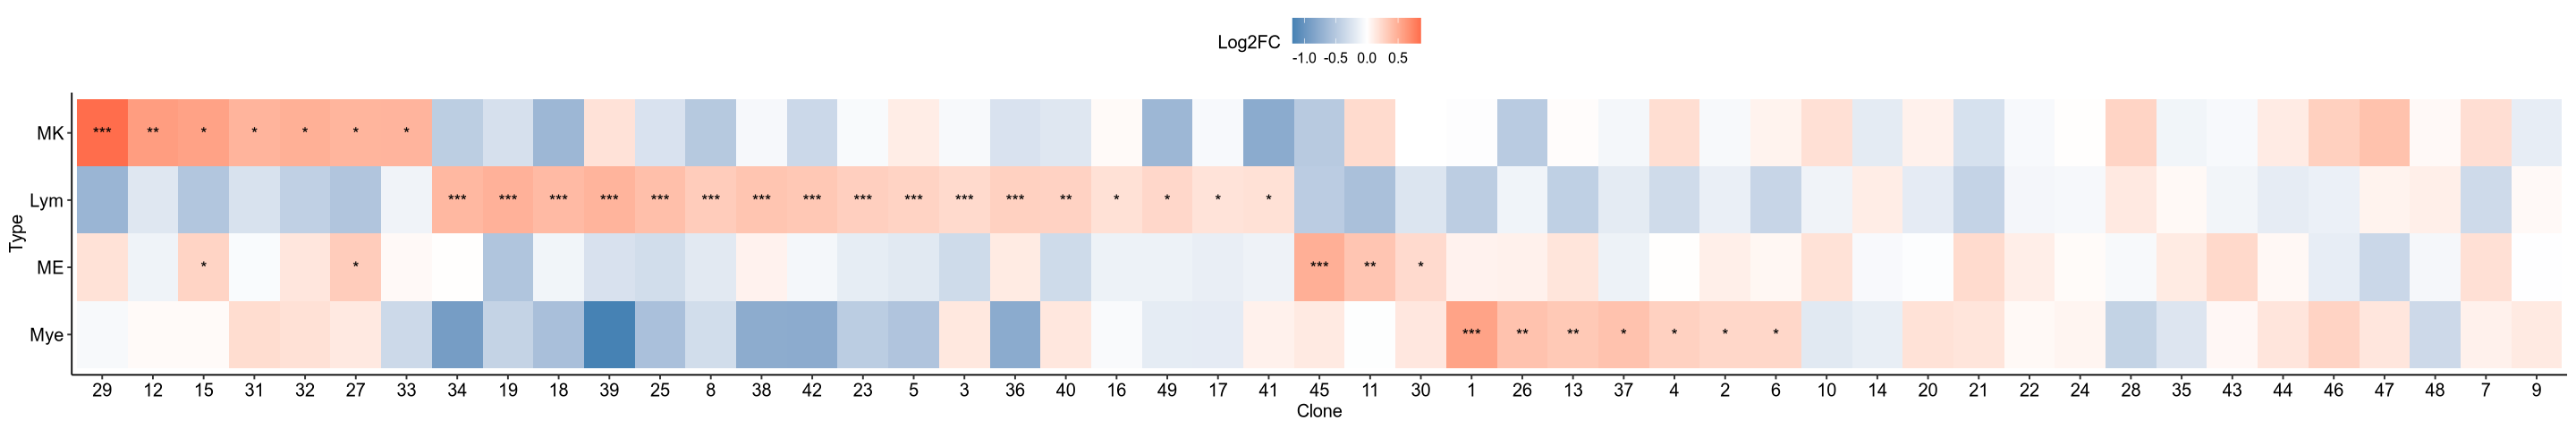

In [51]:
datatoplot.m<-rbind(MK.datatoplot,Lym.datatoplot,ME.datatoplot,Mye.datatoplot)
datatoplot.m$Clone<-factor(datatoplot.m$Clone,levels=CloneOrder)
datatoplot.m$Type<-factor(datatoplot.m$Type,levels=rev(c("MK","Lym","ME","Mye")))
options(repr.plot.width=24, repr.plot.height=4,repr.plot.res=120)
p.pvalueFC<-ggplot(datatoplot.m)+aes(Clone,Type,fill=Log2FC,label=sig)+geom_tile()+scale_fill_gradient2(high="red",low="steelblue",mid="white")+geom_text()+theme_pubr()
print(p.pvalueFC)

Using npClone as id variables



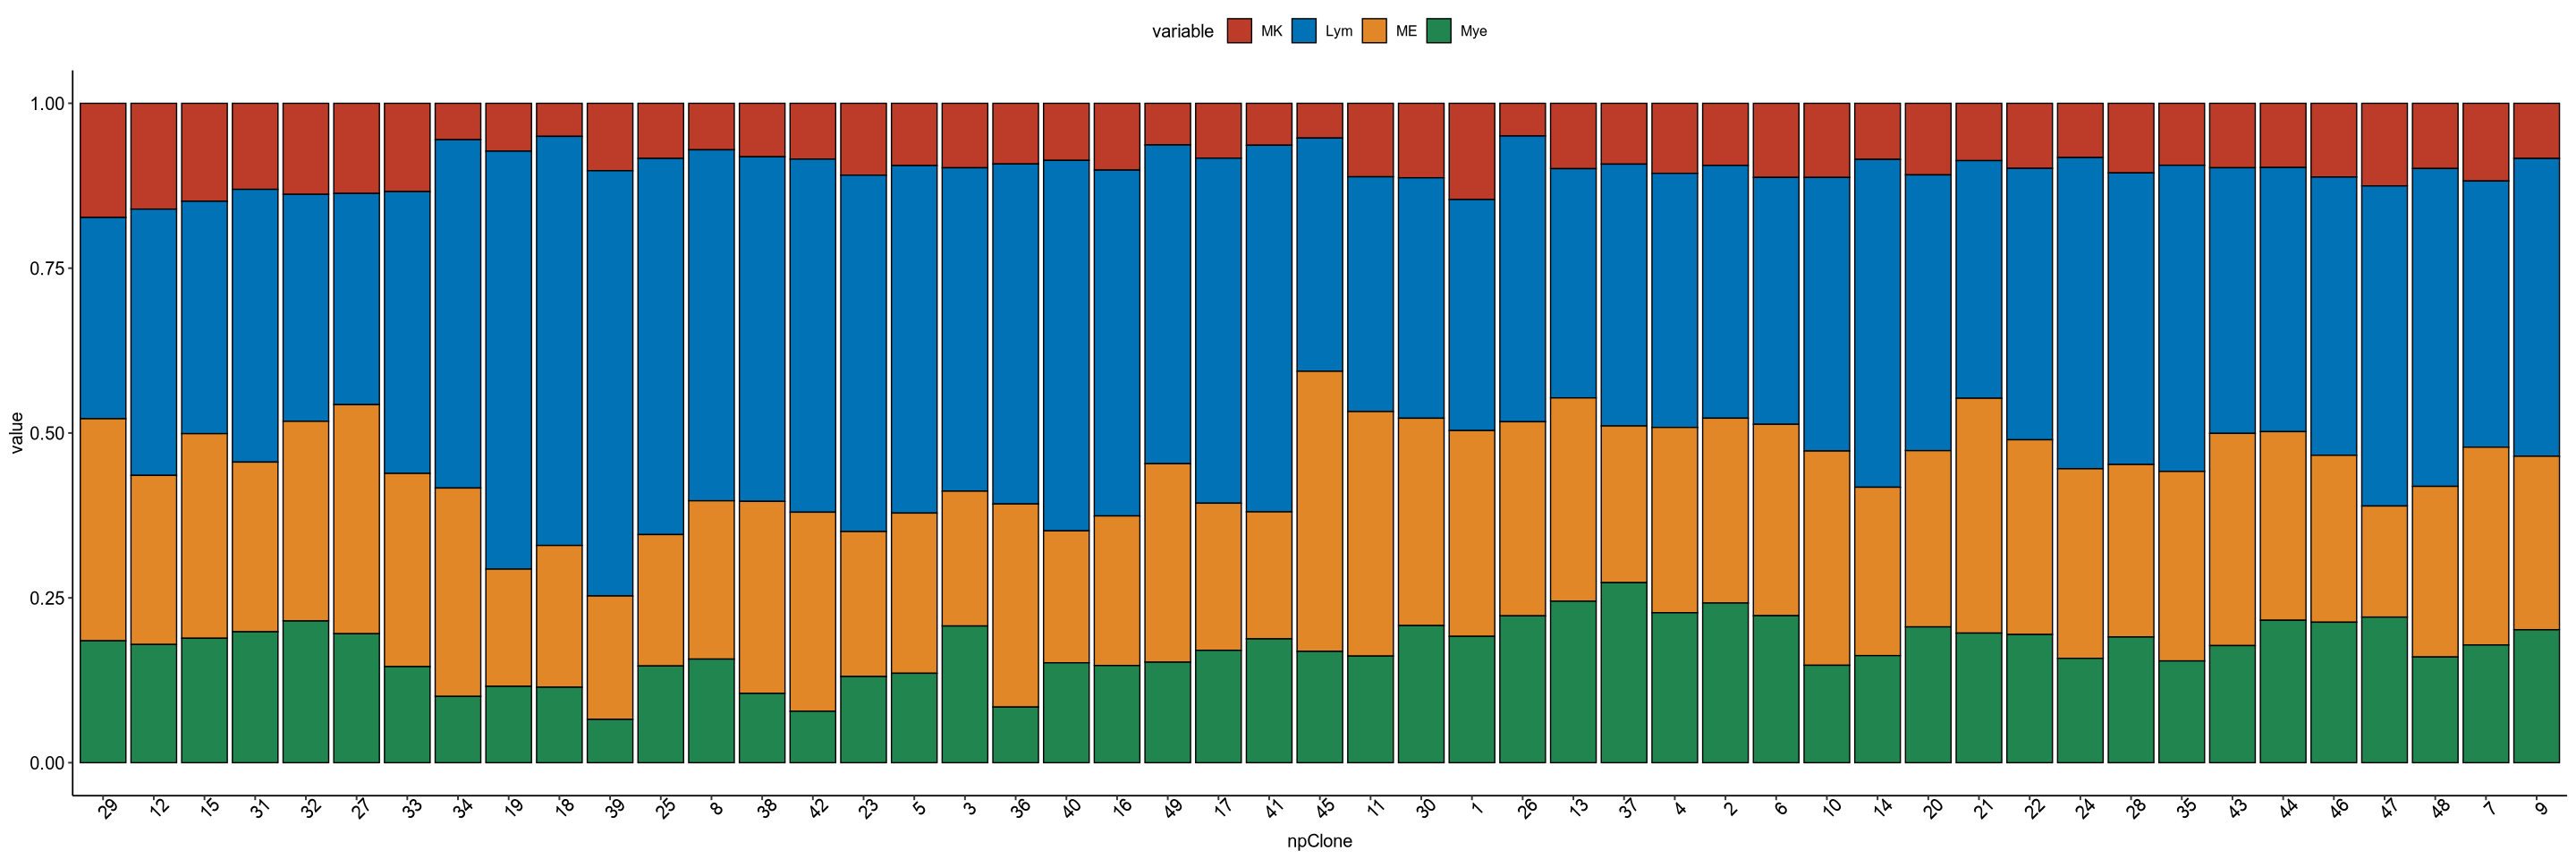

In [52]:
datatoplot<-Young2_RigHSC_LSI_progeny_np_0.7_rig$datatoplot
datatoplot<-datatoplot %>% dplyr::select(npClone,MK,Lym,ME,Total.norm_NPadj,Mye) %>%
mutate(Lym=Lym/(Lym+Mye+ME+MK),Mye=Mye/(Lym+Mye+ME+MK),ME=ME/(Lym+Mye+ME+MK),MK=MK/(Lym+Mye+ME+MK))
p<-datatoplot[order(datatoplot[,"npClone"],decreasing=F),] %>% mutate(npClone=factor(npClone,levels=CloneOrder)) %>% dplyr::select(-Total.norm_NPadj)%>% reshape2::melt() %>%
ggplot()+aes(npClone,value,fill=variable)+geom_bar(stat="identity",position="fill",color="black",size=0.4)+scale_fill_nejm()+theme_pubr()+theme(axis.text.x  = element_text(angle = 45))
options(repr.plot.width=24, repr.plot.height=8,repr.plot.res=120)
print(p)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


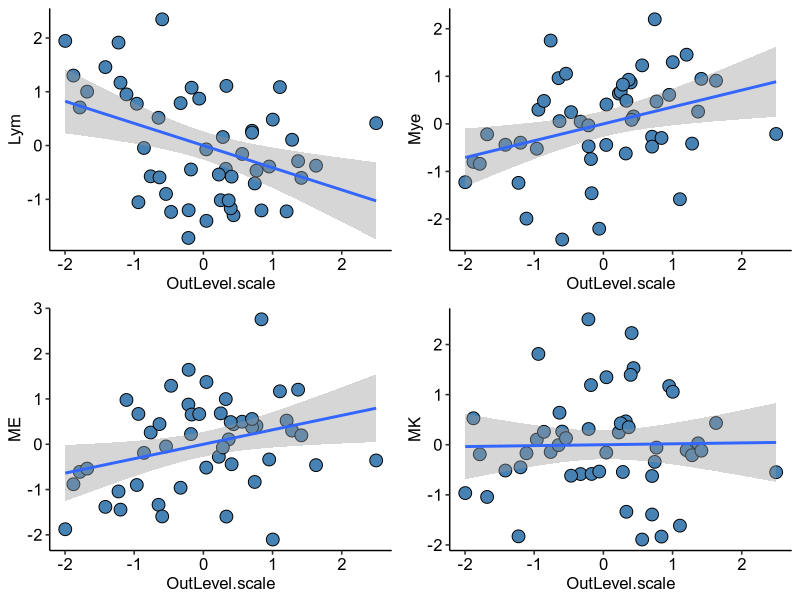

In [54]:
library(ggrepel)
p1<- ggplot(datatoplot)+aes(OutLevel.scale,Lym)+geom_point(shape=21,color="black",fill="steelblue",size=4)+theme_pubr()+geom_smooth(method="lm")
p2<- ggplot(datatoplot)+aes(OutLevel.scale,Mye)+geom_point(shape=21,color="black",fill="steelblue",size=4)+theme_pubr()+geom_smooth(method="lm")
p3<- ggplot(datatoplot)+aes(OutLevel.scale,ME)+geom_point(shape=21,color="black",fill="steelblue",size=4)+theme_pubr()+geom_smooth(method="lm")
p4<- ggplot(datatoplot)+aes(OutLevel.scale,MK)+geom_point(shape=21,color="black",fill="steelblue",size=4)+theme_pubr()+geom_smooth(method="lm")

options(repr.plot.width=8, repr.plot.height=6,repr.plot.res=100)
grid.arrange(p1,p2,p3,p4,nrow=2)


# HSC behavioral trajectory analysis

In [92]:
## Create a dataframe that summarize each of the HSC clonal behavior, also including averaged gene expression/peak intensity for each clone. This dataframe can be created using MakeDF4Regress from redeemR. This dataframe is further used as input for regression analysis
Young1_HSC_LSI_LinOut.gene.df<-readRDS(paste(Dir,"/data/SCAVENGE-L/DN4_HSC_LSI_LinOut.gene.df",sep=""))
Young1_HSC_LSI_LinOut.atac.df<-readRDS(paste(Dir,"/data/SCAVENGE-L/DN4_HSC_LSI_LinOut.atac.df",sep=""))

In [94]:
head(Young1_HSC_LSI_LinOut.gene.df[[1]],n=3) 

npClone Lym        Mye        ME        MK         OutLevel.scale
1 1       -1.1314523  1.7437079 1.2563935 -0.6969464  4.8633099    
2 10      -0.6408151  1.0211405 0.6711131  0.5201679 -0.5818932    
3 11      -0.2090723 -0.2101891 0.4620766 -0.2829262 -0.4725672    
  OutLevel_NPadj.scale TotalUMI LINC01409 LINC01128 ⋯ MT-ATP8 MT-ATP6 MT-CO3
1  4.7927280           604817   6         7         ⋯ 239     1794    2159  
2 -0.2924605           363461   6         3         ⋯ 131     1134    1380  
3 -0.3055178           387816   6         4         ⋯ 145     1246    1528  
  MT-ND3 MT-ND4L MT-ND4 MT-ND5 MT-ND6 MT-CYB AL592183.1
1 1047   314     1567   705    90     1244   37        
2  619   162      958   449    58      770   26        
3  659   206     1050   494    60      853   18

- npClone: HSC clonal group
- Lym: Lymphoid bias score
- Mye: Myeloid bias score
- ME: Mega/Ery bias score
- MK: Megakaryocyte bias score
- OutLevel.scale: HSC clonal output level, network propagation adjusted
- OutLevel_NPadj.scale: HSC clonal output level, network propagation adjusted
- TotalUMI: total UMI for an HSC clonal group
- Rest of columns: HSC clonal group pseudobulk gene expression count

Use the R script here to perform regression analysis</br>
**Rscript Dir/API/Run_Lin_regression.R poi Core Young1_HSC_LSI_LinOut.gene.df name**

In [98]:
## Load the regression results which was run as above
Young1_HSC_LSI_LinOut.atac.poi<-readRDS(paste(Dir,"/data/SCAVENGE-L/DN4_HSC_LSI_LinOut.atac.poi.RDS",sep=""))
Young1_HSC_LSI_LinOut.gene.poi<-readRDS(paste(Dir,"/data/SCAVENGE-L/DN4_HSC_LSI_LinOut.gene.poi.RDS",sep=""))

In [104]:
## Define function to plot
PlotLinRegress_Vocano<-function(LinOutregress=DN4_HSC_LSI_LinOut.gene.poi,slot="ps",pline=0.001,qline=0.05){
ps<-list()
for(i in 2:6){
Name<-colnames(LinOutregress$ps)[i]
datatoplot<-data.frame(row.names=row.names(LinOutregress$ps),ps=LinOutregress$ps[,i],qs=LinOutregress$qs[,i],slopes=LinOutregress$slopes[,i]) 
datatoplot<-datatoplot %>% mutate(score=-log(qs)*abs(slopes))
Label<-subset(datatoplot,qs<0.2) %>% .[order(.$score,decreasing=T),] %>% .[1:80,] %>% row.names
slope.L<-subset(datatoplot,qs<0.2)$slopes %>% min
slope.R<-subset(datatoplot,qs<0.2)$slopes %>% max
datatoplot$Label<-ifelse(row.names(datatoplot) %in% Label,row.names(datatoplot),"")
print(Name)
if(slot=="qs"){    
p<-ggplot(datatoplot)+aes(slopes,-log10(qs),label=Label)+geom_point()+geom_hline(yintercept=-log10(qline),linetype=2)+
geom_vline(xintercept=c(-0.02,0.02),linetype=2)+xlim(slope.L-0.1,slope.R+0.1)+geom_text_repel(force = 2,size=5)+theme_pubr()+ggtitle(Name)
}else{
p<-ggplot(datatoplot)+aes(slopes,-log10(ps),label=Label)+geom_point()+geom_hline(yintercept=-log10(pline),linetype=2)+
geom_vline(xintercept=c(-0.02,0.02),linetype=2)+xlim(slope.L-0.1,slope.R+0.1)+geom_text_repel(force = 2,size=5)+theme_pubr()+ggtitle(Name)
}
ps<-c(ps,list(p))
}
names(ps)<-colnames(LinOutregress$ps)[2:ncol(LinOutregress$ps)]
return(ps)
}

PlotLinRegress_Vocano_lim<-function(LinOutregress=DN4_HSC_LSI_LinOut.gene.poi,slot="ps",pline=0.001,qline=0.05){
ps<-list()
for(i in 2:6){
Name<-colnames(LinOutregress$ps)[i]
datatoplot<-data.frame(row.names=row.names(LinOutregress$ps),ps=LinOutregress$ps[,i],qs=LinOutregress$qs[,i],slopes=LinOutregress$slopes[,i]) 
datatoplot<-datatoplot %>% mutate(score=-log(qs)*abs(slopes))
Label<-subset(datatoplot,qs<0.2) %>% .[order(.$score,decreasing=T),] %>% .[1:80,] %>% row.names
slope.L<-subset(datatoplot,qs<0.2)$slopes %>% min
slope.R<-subset(datatoplot,qs<0.2)$slopes %>% max
datatoplot$Label<-ifelse(row.names(datatoplot) %in% Label,row.names(datatoplot),"")
print(Name)
if(slot=="qs"){    
p<-ggplot(datatoplot)+aes(slopes,-log10(qs),label=Label)+geom_point()+geom_hline(yintercept=-log10(qline),linetype=2)+
geom_vline(xintercept=c(-0.02,0.02),linetype=2)+xlim(-2,2)+ylim(0,5)+geom_text_repel(force = 2,size=5)+theme_pubr()+ggtitle(Name)
}else{
p<-ggplot(datatoplot)+aes(slopes,-log10(ps),label=Label)+geom_point()+geom_hline(yintercept=-log10(pline),linetype=2)+
geom_vline(xintercept=c(-0.02,0.02),linetype=2)+xlim(-2,2)+ylim(0,5)+geom_text_repel(force = 2,size=5)+theme_pubr()+ggtitle(Name)
}
ps<-c(ps,list(p))
}
names(ps)<-colnames(LinOutregress$ps)[2:ncol(LinOutregress$ps)]
return(ps)
}
PlotLinRegress_Vocano_nolabel<-function(LinOutregress=DN4_HSC_LSI_LinOut.gene.poi,slot="ps",pline=0.001,qline=0.05){
ps<-list()
for(i in 2:6){
Name<-colnames(LinOutregress$ps)[i]
datatoplot<-data.frame(row.names=row.names(LinOutregress$ps),ps=LinOutregress$ps[,i],qs=LinOutregress$qs[,i],slopes=LinOutregress$slopes[,i]) 
datatoplot<-datatoplot %>% mutate(score=-log(qs)*abs(slopes))
Label<-subset(datatoplot,qs<0.2) %>% .[order(.$score,decreasing=T),] %>% .[1:80,] %>% row.names
slope.L<-subset(datatoplot,qs<0.2)$slopes %>% min
slope.R<-subset(datatoplot,qs<0.2)$slopes %>% max
datatoplot$Label<-ifelse(row.names(datatoplot) %in% Label,row.names(datatoplot),"")
print(Name)
if(slot=="qs"){    
p<-ggplot(datatoplot)+aes(slopes,-log10(qs),label=Label)+geom_point()+geom_hline(yintercept=-log10(qline),linetype=2)+
geom_vline(xintercept=c(-0.02,0.02),linetype=2)+xlim(slope.L-0.1,slope.R+0.1)+theme_pubr()+ggtitle(Name)
}else{
p<-ggplot(datatoplot)+aes(slopes,-log10(ps),label=Label)+geom_point()+geom_hline(yintercept=-log10(pline),linetype=2)+
geom_vline(xintercept=c(-0.02,0.02),linetype=2)+xlim(slope.L-0.1,slope.R+0.1)+theme_pubr()+ggtitle(Name)
}
ps<-c(ps,list(p))
}
names(ps)<-colnames(LinOutregress$ps)[2:ncol(LinOutregress$ps)]
return(ps)
}

In [105]:
## Plot
Young1_HSC_LSI_LinOut.gene.poi.vocanos<-PlotLinRegress_Vocano(LinOutregress=Young1_HSC_LSI_LinOut.gene.poi,slot="ps")
Young1_HSC_LSI_LinOut.atac.poi.vocanos<-PlotLinRegress_Vocano(LinOutregress=Young1_HSC_LSI_LinOut.atac.poi,slot="ps")
Young1_HSC_LSI_LinOut.gene.poi.vocanos.fdr<-PlotLinRegress_Vocano_lim(LinOutregress=Young1_HSC_LSI_LinOut.gene.poi,slot="qs")
Young1_HSC_LSI_LinOut.atac.poi.vocanos.fdr<-PlotLinRegress_Vocano_lim(LinOutregress=Young1_HSC_LSI_LinOut.atac.poi,slot="qs")

[1] "OutLevel_NPadj.scale"
[1] "Lym"
[1] "Mye"
[1] "MK"
[1] "ME"
[1] "OutLevel_NPadj.scale"
[1] "Lym"
[1] "Mye"
[1] "MK"
[1] "ME"
[1] "OutLevel_NPadj.scale"
[1] "Lym"
[1] "Mye"
[1] "MK"
[1] "ME"
[1] "OutLevel_NPadj.scale"
[1] "Lym"
[1] "Mye"
[1] "MK"
[1] "ME"


[1] "Regress for genes"


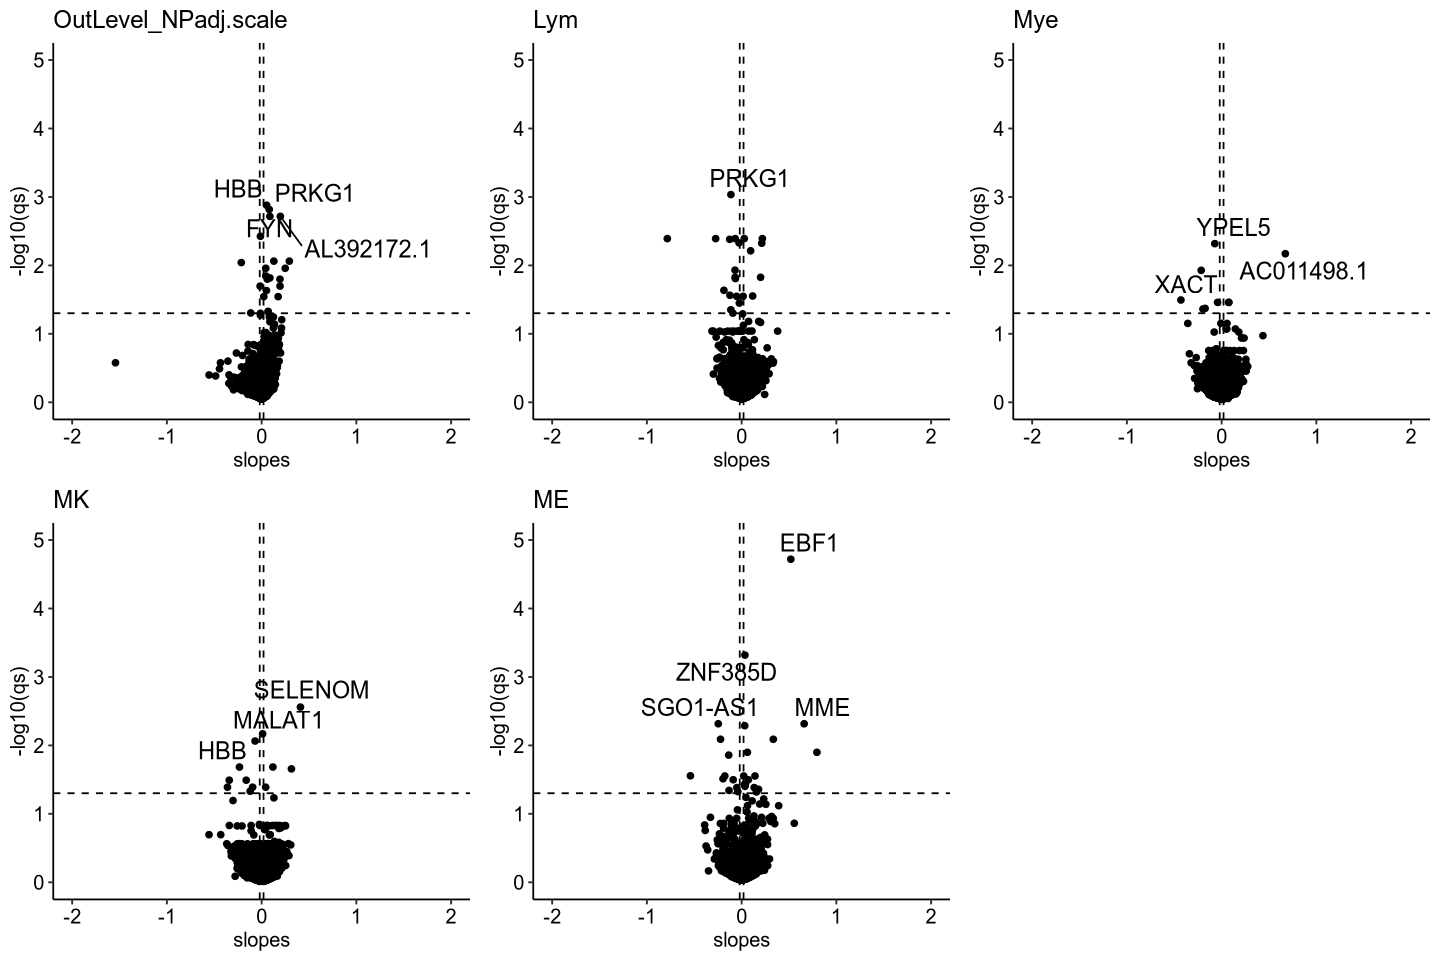

In [110]:
options(repr.plot.width=12, repr.plot.height=8,repr.plot.res=120)
print("Regress for genes")
suppressWarnings(grid.arrange(grobs=Young1_HSC_LSI_LinOut.gene.poi.vocanos.fdr,nrow=2))

[1] "Regress for peaks"


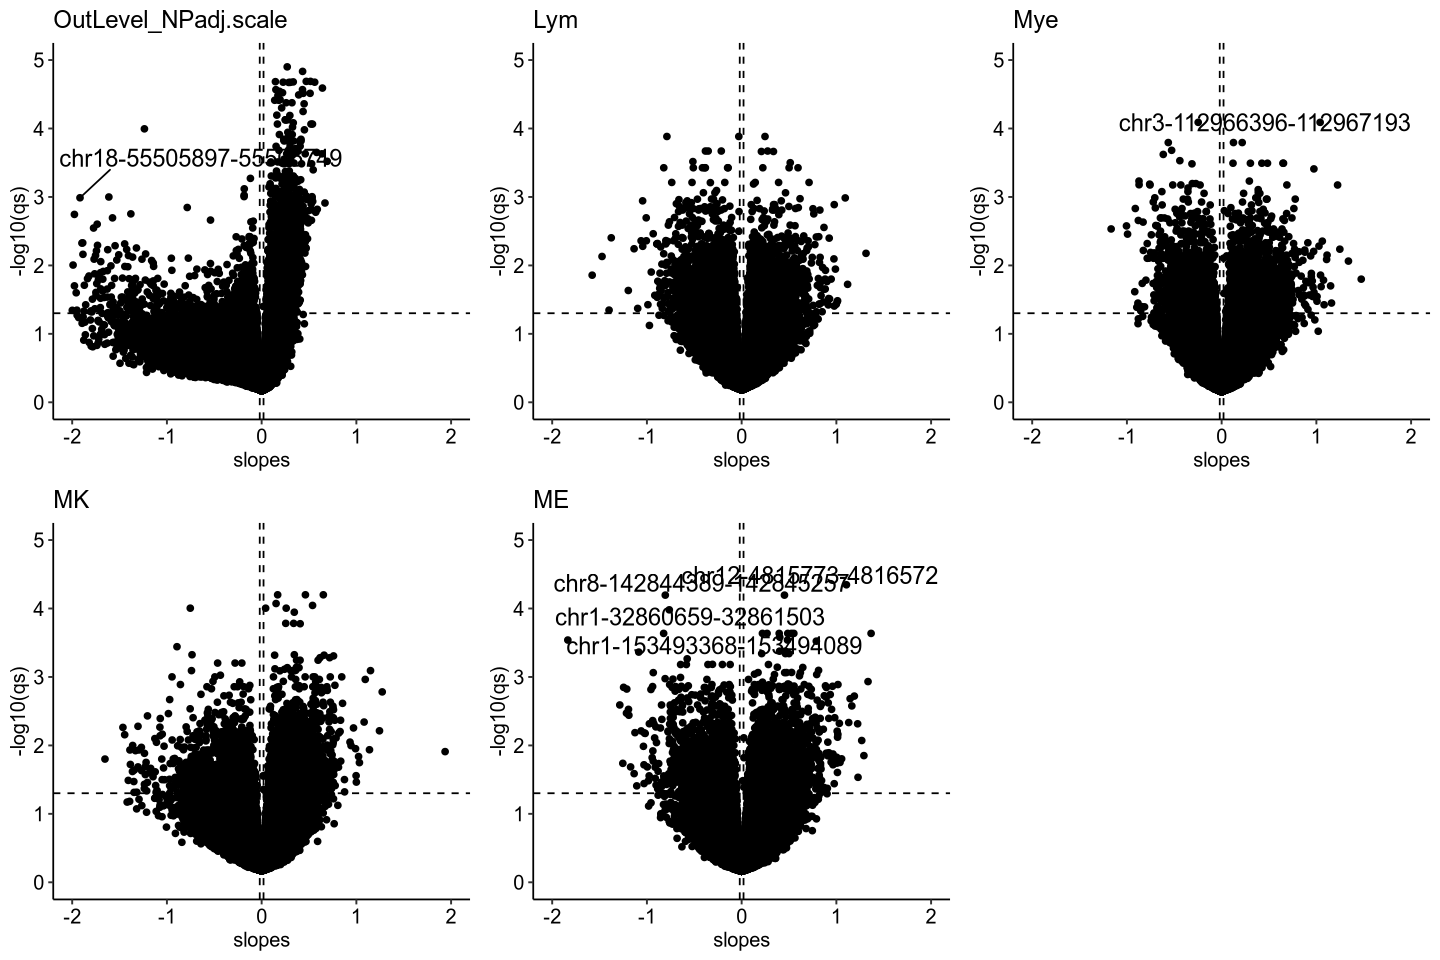

In [111]:
options(repr.plot.width=12, repr.plot.height=8,repr.plot.res=120)
print("Regress for peaks")
suppressWarnings(grid.arrange(grobs=Young1_HSC_LSI_LinOut.atac.poi.vocanos.fdr,nrow=2))

OutLevel_NPadj.scale Lym         Mye          MK          
DDI2     0.097616001         -0.02909129  0.085130267 -0.257921854
SPEN     0.058633683          0.04234058 -0.022888906 -0.121337119
RPS6KA1  0.140189894         -0.10863328  0.094918698 -0.109399932
RPS8    -0.007558184          0.01186017 -0.009608684  0.001981302
JUN      0.059766205         -0.03075733  0.076056669 -0.032520826
HOOK1    0.133235617         -0.08738038  0.079454466 -0.053102824
        ME           
DDI2     0.1710036610
SPEN     0.0026272310
RPS6KA1  0.2112363392
RPS8    -0.0005752531
JUN      0.0096190951
HOOK1    0.1093927224

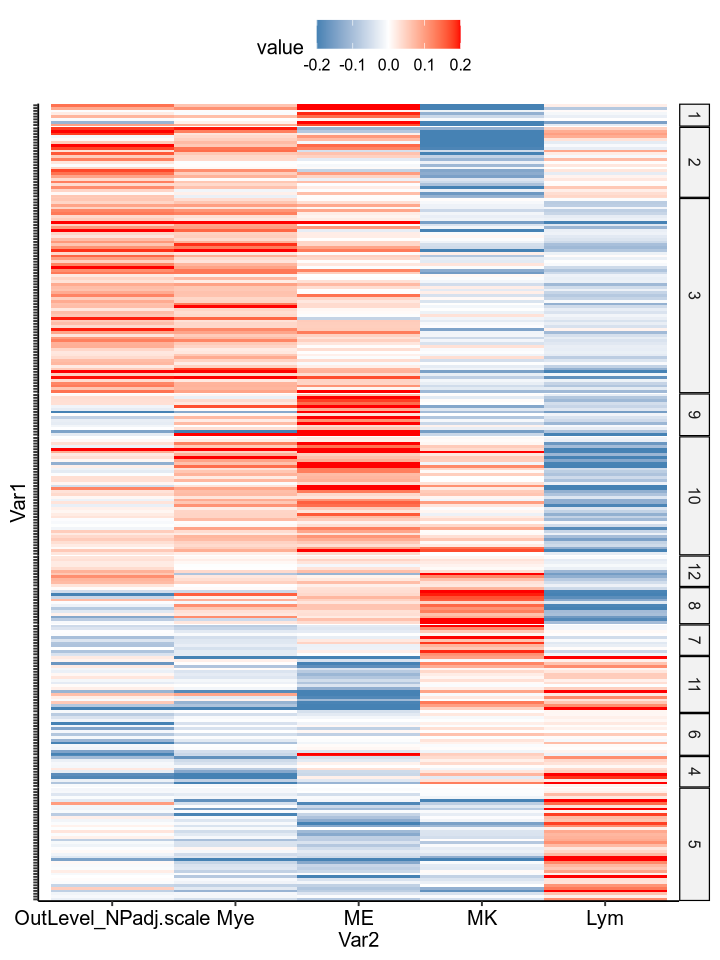

In [122]:
## Although we identify very few differential genes, still try to take a look they using a very loose threhold 
cut=0.2
HSC_prim.genes<-Young1_HSC_LSI_LinOut.gene.poi$qs %>% select(-OutLevel.scale) %>% subset(.,OutLevel_NPadj.scale<=cut | Lym<=cut | Mye<=cut | MK<=cut| ME<=cut) %>% row.names
Young1_HSC_LSI_LinOut.gene.poi$slopes[HSC_prim.genes,] %>% select(-OutLevel.scale) %>% as.matrix() %>% head
# my_palette <- colorRampPalette(c("red", "white", "steelblue"))(n = 299)
options(repr.plot.width=6, repr.plot.height=8,repr.plot.res=300)
datatoplot<-Young1_HSC_LSI_LinOut.gene.poi$slopes[HSC_prim.genes,] %>% select(-OutLevel.scale) %>% as.matrix() #heatmap.2(.,col=my_palette)
md<-hclust(Dist(datatoplot,method="correlation"))
Genegroup<-cutree(md,12) %>% data.frame(cluster=.) %>% tibble::rownames_to_column("Var1")
heatp.gene<-reshape2::melt(datatoplot) %>% mutate(Var2=factor(Var2,levels=c("OutLevel_NPadj.scale","Mye","ME","MK","Lym")))%>% merge(.,Genegroup) %>% 
mutate(cluster=factor(cluster,levels=c(1,2,3,9,10,12,8,7,11,6,4,5))) %>% ggplot()+aes(Var2,Var1,fill=value)+geom_tile()+scale_fill_gradient2(low="steelblue",mid="white",high="red",limits=c(-0.2,0.2),oob=scales::squish)+facet_grid(cluster~.,scale="free",space="free")+
theme_pubr()+theme(axis.text.y = element_blank(),panel.margin = unit(0, "lines"))
options(repr.plot.width=6, repr.plot.height=8,repr.plot.res=120)
print(heatp.gene)

OutLevel_NPadj.scale Lym         Mye         MK         
chr1-629485-630638   -0.006973654         -0.03009952  0.02309495  0.04222517
chr1-633371-634509    0.007853639         -0.02394189  0.02518049  0.01381058
chr1-925168-925912    0.169183910          0.01587285 -0.04674175 -0.22836653
chr1-1063796-1064680 -0.040520661          0.03049634 -0.09320491  0.03937849
chr1-1324299-1325191  0.009259838         -0.07575487  0.12018327 -0.04889816
chr1-1358222-1359047  0.031346843         -0.24842674  0.36544848 -0.04230497
                     ME         
chr1-629485-630638    0.02348369
chr1-633371-634509    0.01339107
chr1-925168-925912    0.10303155
chr1-1063796-1064680 -0.04767119
chr1-1324299-1325191  0.01658602
chr1-1358222-1359047  0.24419293

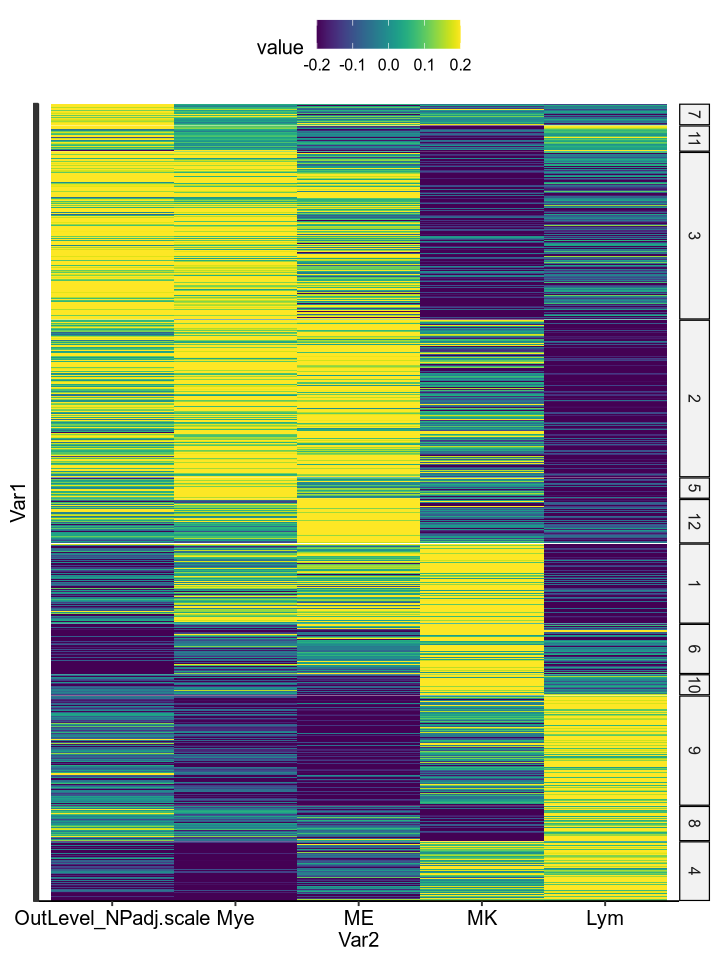

In [117]:
## Categarize HSC clona behaviral trajectory peaks
cut=0.01
HSC_prim.atacs<-Young1_HSC_LSI_LinOut.atac.poi$qs %>% select(-OutLevel.scale) %>% subset(.,OutLevel_NPadj.scale<=cut | Lym<=cut | Mye<=cut | MK<=cut| ME<=cut) %>% row.names
Young1_HSC_LSI_LinOut.atac.poi$slopes[HSC_prim.atacs,] %>% select(-OutLevel.scale) %>% as.matrix() %>% head
datatoplot<-Young1_HSC_LSI_LinOut.atac.poi$slopes[HSC_prim.atacs,] %>% select(-OutLevel.scale) %>% as.matrix() #heatmap.2(.,col=my_palette)
md<-hclust(Dist(datatoplot,method="correlation"))
ATACgroup<-cutree(md,12) %>% data.frame(cluster=.) %>% tibble::rownames_to_column("Var1")
heatp.atac<-reshape2::melt(datatoplot) %>% mutate(Var2=factor(Var2,levels=c("OutLevel_NPadj.scale","Mye","ME","MK","Lym")))%>% merge(.,ATACgroup) %>% 
mutate(cluster=factor(cluster,levels=c(7,11,3,2,5,12,1,6,10,9,8,4))) %>% ggplot()+aes(Var2,Var1,fill=value)+geom_tile()+scale_fill_viridis(limits=c(-0.2,0.2),oob=scales::squish)+facet_grid(cluster~.,scale="free",space="free")+
theme_pubr()+theme(axis.text.y = element_blank(),panel.margin = unit(0, "lines"))
options(repr.plot.width=6, repr.plot.height=8,repr.plot.res=120)
print(heatp.atac)

In [134]:
## Summary of different categories of differential genes
Out_Mye<-subset(Genegroup,cluster %in% c(1,2,3) ) %>% .$ Var1
ME<-subset(Genegroup,cluster %in% c(9,10) ) %>% .$ Var1
MK<-subset(Genegroup,cluster %in% c(12,8,7) ) %>% .$ Var1
Lym<-subset(Genegroup,cluster %in% c(11,6,4,5) ) %>% .$ Var1
GeneList<-list(Out_Mye=Out_Mye,ME=ME,MK=MK,Lym=Lym)

In [133]:
## Summary of different categories of differential peaks
Out<-subset(ATACgroup,cluster %in% c(7,11) ) %>% .$ Var1
Out_Mye<-subset(ATACgroup,cluster %in% c(3) ) %>% .$ Var1
Mye_ME<-subset(ATACgroup,cluster %in% c(2,5) ) %>% .$ Var1
ME<-subset(ATACgroup,cluster %in% c(12) ) %>% .$ Var1
MK<-subset(ATACgroup,cluster %in% c(1,6,10) ) %>% .$ Var1
Lym<-subset(ATACgroup,cluster %in% c(9,8,4) ) %>% .$ Var1
ATACList<-list(Out=Out,Out_Mye=Out_Mye,Mye_ME=Mye_ME,ME=ME,MK=MK,Lym=Lym)

In [120]:
## 1, write out all peaks of Young1 HSC out
## 2, Use HOMER (annotatePeaks.pl) to annotate peaks
## 3, Load annotated peaks
Young1_HSC_ATAC_10XALL_peakAnno.bed<-read.delim(paste(Dir,"/data/SCAVENGE-L/DN4_HSC_ATAC_10XALL_peakAnno.bed",sep=""))

In [146]:
Young1_HSC_ATAC_10XALL_peakAnno<-Young1_HSC_ATAC_10XALL_peakAnno.bed[,c("Chr","Start","End","Annotation","Distance.to.TSS","Gene.Name")] %>% 
mutate(Peak=paste(Chr,Start-1, End,sep="-")) %>% select(-Chr,-Start,-End) %>% .[,c("Peak","Gene.Name","Annotation","Distance.to.TSS")] 
row.names(Young1_HSC_ATAC_10XALL_peakAnno)<-Young1_HSC_ATAC_10XALL_peakAnno$Peak

In [148]:
## Different categories of peaks and the nearby genes by annotation
peakAnno_out<-subset(Young1_HSC_ATAC_10XALL_peakAnno,Peak %in% ATACList[[1]]) %>% .$Gene.Name %>% unique
peakAnno_Out_Mye<-subset(Young1_HSC_ATAC_10XALL_peakAnno,Peak %in% ATACList[[2]]) %>% .$Gene.Name %>% unique
peakAnno_Mye_ME<-subset(Young1_HSC_ATAC_10XALL_peakAnno,Peak %in% ATACList[[3]]) %>% .$Gene.Name %>% unique
peakAnno_ME<-subset(Young1_HSC_ATAC_10XALL_peakAnno,Peak %in% ATACList[[4]]) %>% .$Gene.Name %>% unique
peakAnno_MK<-subset(Young1_HSC_ATAC_10XALL_peakAnno,Peak %in% ATACList[[5]]) %>% .$Gene.Name %>% unique
peakAnno_Lym<-subset(Young1_HSC_ATAC_10XALL_peakAnno,Peak %in% ATACList[[6]]) %>% .$Gene.Name %>% unique
peakNearGene<-list(peakAnno_out=peakAnno_out,peakAnno_Out_Mye=peakAnno_Out_Mye,peakAnno_Mye_ME=peakAnno_Mye_ME,peakAnno_ME=peakAnno_ME,peakAnno_MK=peakAnno_MK,peakAnno_Lym=peakAnno_Lym)

In [128]:
## Prepare Supplementary Data5
cut=0.01
Young1_ATAC_result.FDR<-Young1_HSC_LSI_LinOut.atac.poi$qs %>% select(-OutLevel.scale) %>% subset(.,OutLevel_NPadj.scale<=cut | Lym<=cut | Mye<=cut | MK<=cut| ME<=cut) %>% Tomerge_v2(.,Young1_HSC_ATAC_10XALL_peakAnno,leavex = T)
Young1_ATAC_result.slope<-Young1_HSC_LSI_LinOut.atac.poi$slopes[row.names(Young1_ATAC_result.FDR),] %>% select(-OutLevel.scale) %>% Tomerge_v2(.,Young1_HSC_ATAC_10XALL_peakAnno,leavex = T)

cut=0.01
Young1_gene_result.FDR<-Young1_HSC_LSI_LinOut.gene.poi$qs %>% select(-OutLevel.scale) %>% subset(.,OutLevel_NPadj.scale<=cut | Lym<=cut | Mye<=cut | MK<=cut| ME<=cut) 
Young1_gene_result.slope<-Young1_HSC_LSI_LinOut.gene.poi$slopes[row.names(Young1_gene_result.FDR),] %>% select(-OutLevel.scale)

SupplementaryData5<-list(Young1_ATAC_result.FDR=Young1_ATAC_result.FDR,Young1_ATAC_result.slope=Young1_ATAC_result.slope,Young1_gene_result.FDR=Young1_gene_result.FDR,Young1_gene_result.slope=Young1_gene_result.slope)

In [130]:
# Motif enrichment analysis (Shell)

## Step 1, write out all peaks of Young1 HSC out
##Run below in shell /lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Shell_HSC_multiome_Het_2/Motif/
# Step 2 convert bed to fa
# ```shell
# for f in *.bed
# do
#   bedtools getfasta -fi /lab/solexa_weissman/cweng/Genomes/GRCH38/hg38.fa -bed $f -fo ${f/.bed/.fa} -name &
# done
#```

# Step 3 run Fimo
# ```shell
# Tfmotif=/lab/solexa_weissman/cweng/Genomes/TFmotifs
# meme=/lab/solexa_weissman/cweng/Packages/MEME/meme_bin/bin/
# $meme/fimo --o DN4_HSC_ATAC_10XALL_fimo $Tfmotif/HOCOMOCOv11_full_HUMAN_mono_meme_format.meme  ./DN4_HSC_ATAC_10XALL.fa
# ```

In [131]:
## Load fimo results
fimo<-paste(Dir,"/data/SCAVENGE-L/DN4_HSC_ATAC_10XALL_fimo/",sep="")
## Input the fimo scan 
all.motif<-read.delim(paste(fimo,"/fimo.tsv",sep=""))
all.motif.sig<-subset(all.motif,p.value<1e-6)
all.motif.sig$motif_id<-factor(all.motif.sig$motif_id,levels=unique(all.motif.sig$motif_id))
all.motif.sig$sequence_name<-gsub("::","",all.motif.sig$sequence_name)

In [135]:
## Motif enrichment for each group of peaks using Motifenrich.binom from redeemR
all.motif.sig$sequence_name<-gsub(":","-",all.motif.sig$sequence_name)
Motif_Enrich<-c()
for(peaks in ATACList){
    sub<-subset(all.motif.sig,sequence_name %in% peaks)
    result<-Motifenrich.binom(sub,all.motif.sig)
    result<-subset(result,qvalue<0.2 & FC>1.2) %>% .[order(.$FC,decreasing=T),]
    Motif_Enrich<-c(Motif_Enrich,list(result))
}
names(Motif_Enrich)<-names(ATACList)

In [136]:
ps<-list()
for (i in 1:length(Motif_Enrich)){
p<-Motif_Enrich[[i]] %>% ggplot()+aes(Var1,FC,fill=-log10(pvalues))+geom_bar(stat="identity",color="black")+coord_flip()+scale_fill_gradient(low="white",high="darkred",limit=c(2,5),oob=scales::squish)+theme_pubr()
    ps<-c(ps,list(p))
}

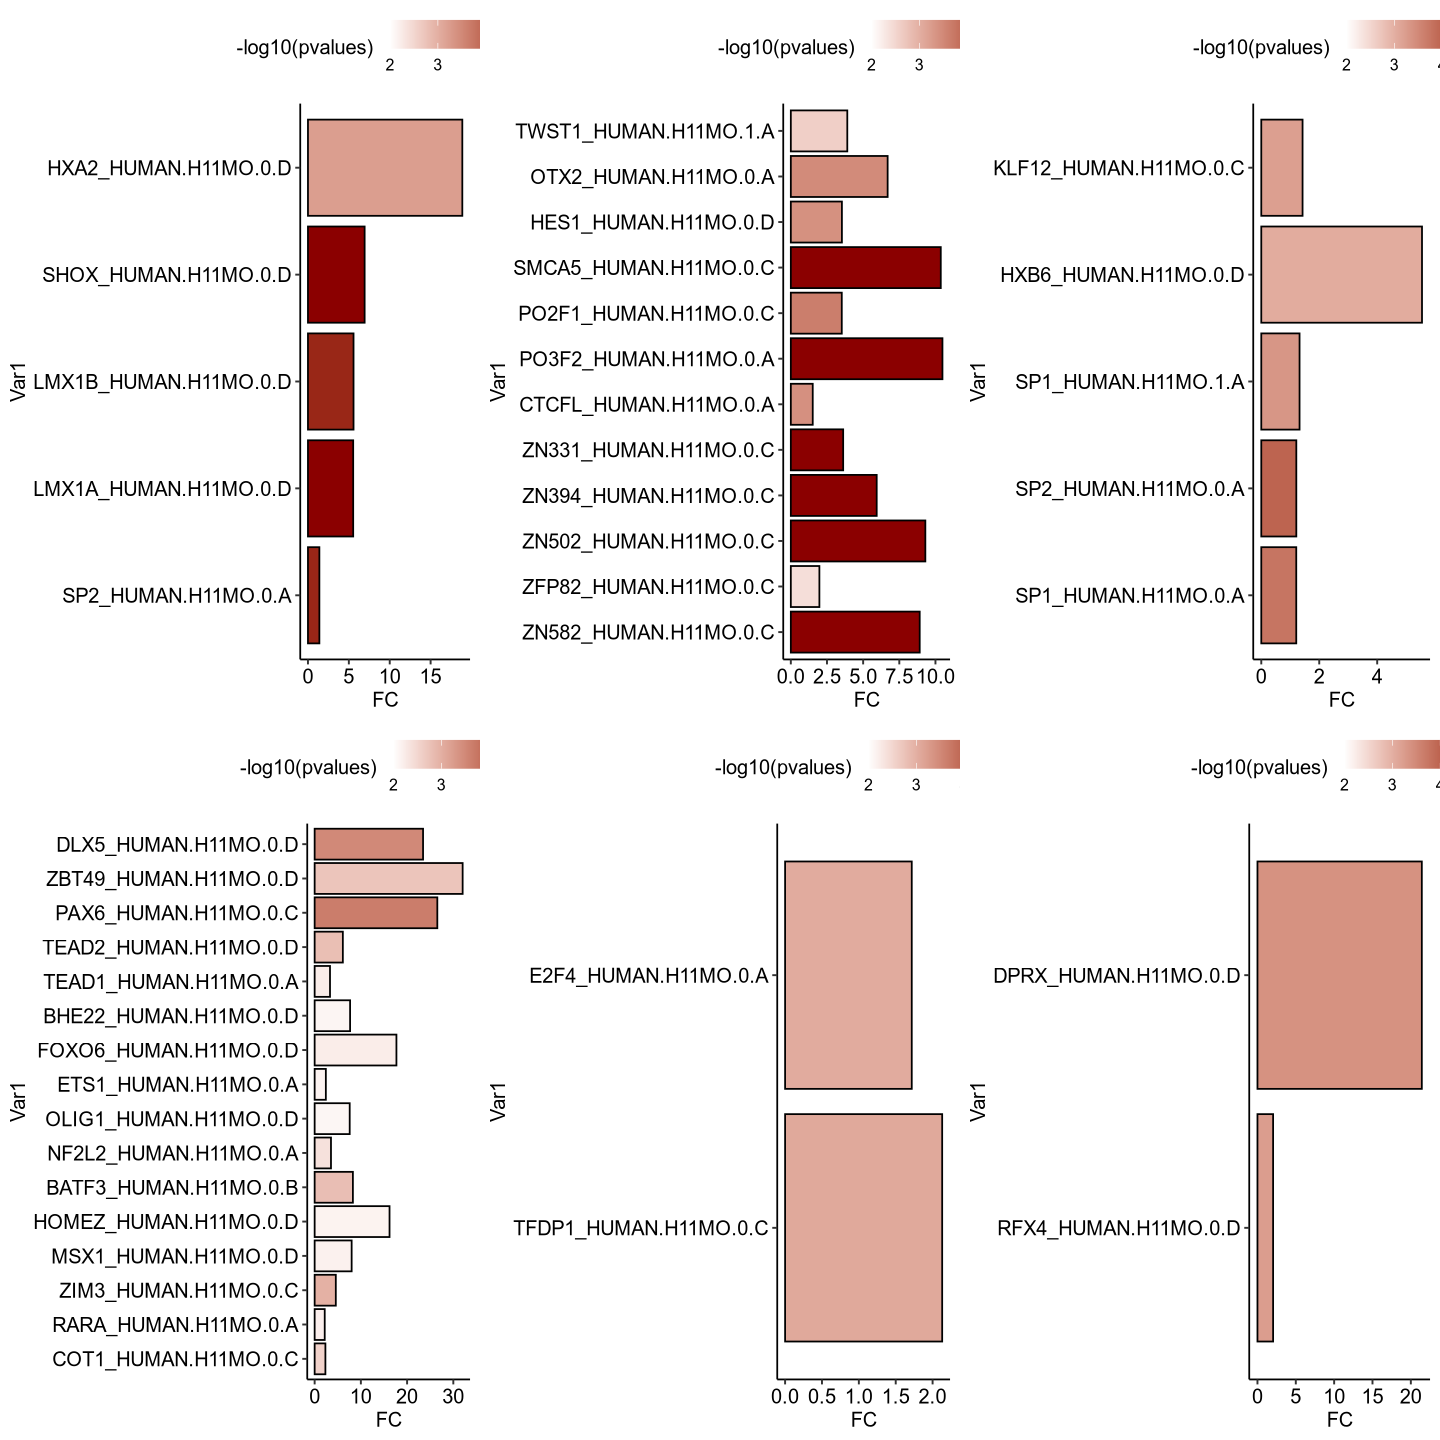

In [138]:
options(repr.plot.width=12, repr.plot.height=12,repr.plot.res=120)
grid.arrange(grobs=ps,nrow=2)

In [174]:
# GSEA analysis
## Direct for differential gene 
data(msig.db) ## This data is with redeemR  msigdb.v5.2.symbols.gmt
data(all.genes.refer) ## This data is with redeemR  msigdb.v5.2.symbols.gmt
Out_Mye<-subset(Genegroup,cluster %in% c(1,2,3) ) %>% .$ Var1
ME<-subset(Genegroup,cluster %in% c(9,10) ) %>% .$ Var1
MK<-subset(Genegroup,cluster %in% c(12,8,7) ) %>% .$ Var1
Lym<-subset(Genegroup,cluster %in% c(11,6,4,5) ) %>% .$ Var1
GeneList<-list(Out_Mye=Out_Mye,ME=ME,MK=MK,Lym=Lym)
HSC.outputLin.RNA.GSEA<-Fun.enrich_withFC(markergenesList=GeneList,All.genes=all.genes.refer)

## Use differential ATAC peak near genes 
HSC.outputLin.ATAC.GSEA<-Fun.enrich_withFC(markergenesList=peakNearGene,All.genes=all.genes.refer)

[1] "Out_Mye"
[1] "ME"
[1] "MK"
[1] "Lym"
[1] "peakAnno_out"
[1] "peakAnno_Out_Mye"
[1] "peakAnno_Mye_ME"
[1] "peakAnno_ME"
[1] "peakAnno_MK"
[1] "peakAnno_Lym"


In [178]:
data.atac<-read.csv(paste(Dir,"/data/SCAVENGE-L/HSC.outputLin.ATAC.GSEA_correct.select.term.csv",sep=""))
data.rna<-read.csv(paste(Dir,"/data/SCAVENGE-L/HSC.outputLin.rna.GSEA.select.csv",sep=""))

In [179]:
data.atac<-data.atac[,c(1,12,13,10,11,8,9,6,7,4,5,2,3,14)]
data.rna<-data.rna[,c(1,8,9,6,7,4,5,2,3,10)]

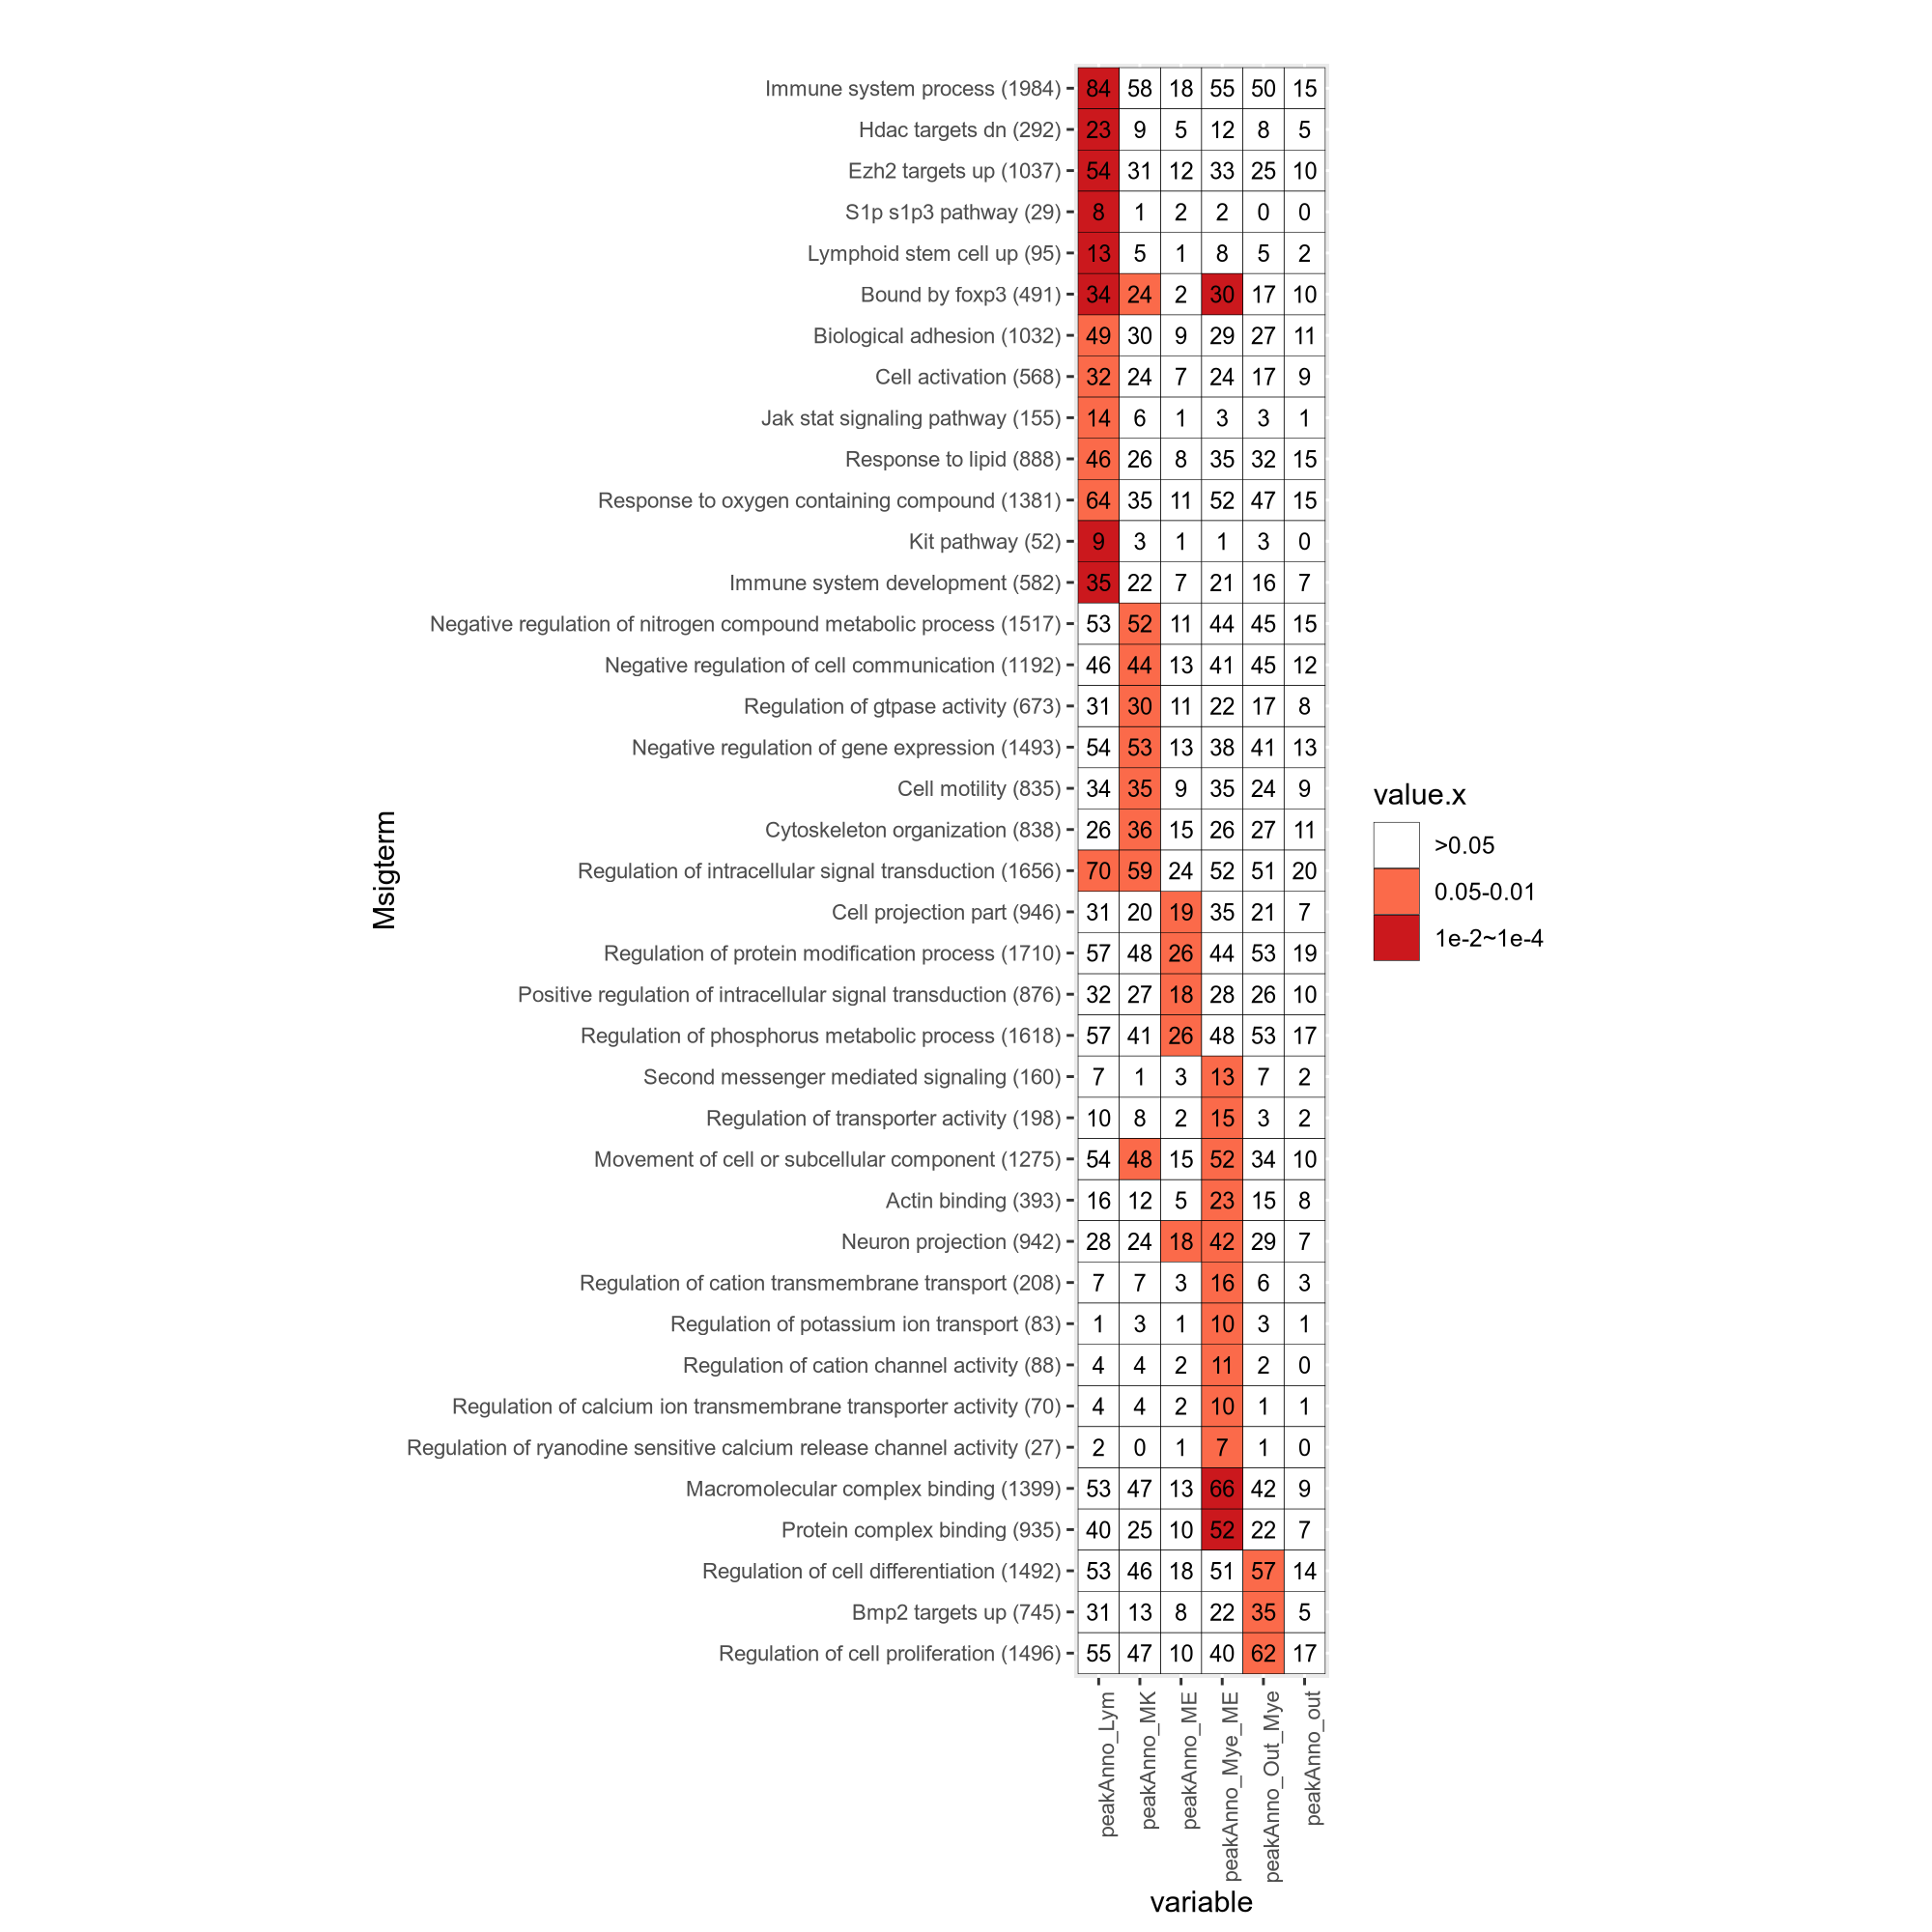

In [185]:
options(repr.plot.width=10, repr.plot.height=10,repr.plot.res=200)
gsea_enrichmentheat(data.atac,HSC.outputLin.ATAC.GSEA,title="",upsidedown = F)

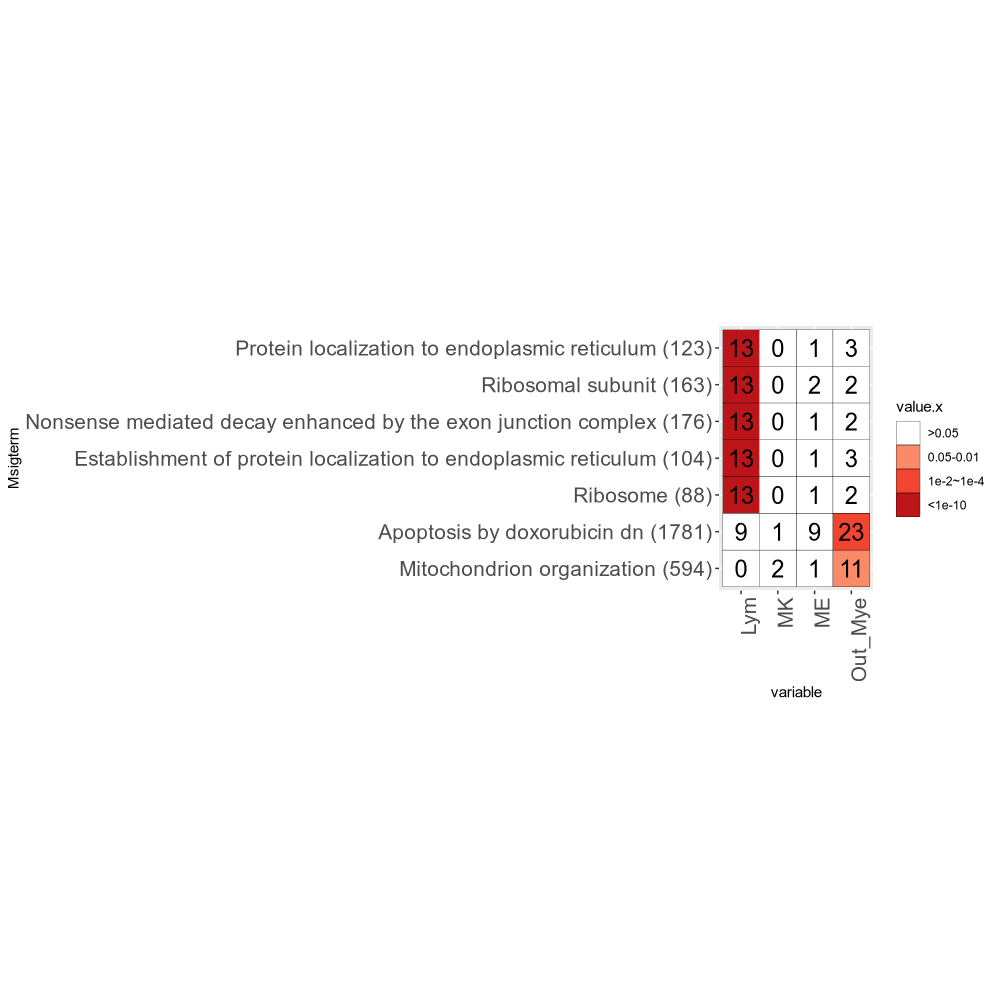

In [189]:
options(repr.plot.width=10, repr.plot.height=10,repr.plot.res=100)
gsea_enrichmentheat(data.rna,HSC.outputLin.RNA.GSEA,title="",upsidedown = F,labelsize = 15,insidesize =6)